<a href="https://colab.research.google.com/github/AjayKarthi14/DSML/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import binom,norm,poisson,ttest_1samp,ttest_ind,ttest_ind_from_stats,chi2,chisquare,chi2_contingency,t,f,f_oneway,kstest,levene,kruskal

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:\
•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?\
•	How well those variables describe the electric cycle demands


# Downloading Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 7.46MB/s]


In [ ]:
df = pd.read_csv("bike_sharing.csv?1642089089")
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

# Basic Observations, value counts and unique values

In [ ]:
df.shape

(10886, 12)

In [ ]:
# There are 10886 rows of information for each hour a day of various attributes(12) related to weather and the count of rental bikes
# 1 String type, 3 float type and 8 integer type datas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Null values in each column
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Number of unique values for each 12 attribute / Column
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
# Mean, Median, Percentile - 25:50:75, Min, Max and Standard Deviation of Integer type attributes
# Some integer attributes are categorical - season , holiday , workingday and weather
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
# Count of each type of season
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
# Count of each type of weather
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
# Count of each type of holiday (not an exact holiday count as it contains hourly data )
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
# Count of each type of workingday (not an exact workingday count as it contains hourly data )
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
# Count of each type of windspeed
df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
# Converting datetime from object to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
# Creating separate columns for day,month,date,year and time
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['time'] = df['datetime'].dt.time
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date  year  month  \
0        81        0.0       3          13     16  2011-01-01  2011      1   
1        80        0.0       8          32     40  2011-01-01  2011      1   
2        80        0.0       5          27     32  2011-01-01  2011      1   
3        75        0.0       3          10     13  2011-01-01  2011      1   
4        75        0.0       0           1      1  2011-01-01  2011      1   

   day      time  
0    1  00:00:00  
1    1  01:00:00  
2    1  02:00:00  
3    1  03:00:00  
4    1  04:00:00

In [ ]:
# Data is collected from 456 unique days and 24 unique hours
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
date            456
year              2
month            12
day              19
time             24
dtype: int64

In [ ]:
df.describe(include='object')

date      time
count        10886     10886
unique         456        24
top     2011-01-01  12:00:00
freq            24       456

In [ ]:
# Count of unique hours for which data is collected
df['time'].value_counts()

12:00:00    456
13:00:00    456
22:00:00    456
21:00:00    456
20:00:00    456
19:00:00    456
18:00:00    456
17:00:00    456
16:00:00    456
15:00:00    456
14:00:00    456
23:00:00    456
11:00:00    455
10:00:00    455
09:00:00    455
08:00:00    455
07:00:00    455
06:00:00    455
00:00:00    455
01:00:00    454
05:00:00    452
02:00:00    448
04:00:00    442
03:00:00    433
Name: time, dtype: int64

In [ ]:
# Count of data collected for each month
df['month'].value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [ ]:
# Count of data collected for each year
df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [ ]:
# Start and end date denoting the period of data collected
print("Start Date : " , df['date'].min())
print("End Date : " , df['date'].max())

Start Date :  2011-01-01
End Date :  2012-12-19


In [ ]:
# Weather ratios for a given season with most of the time clear and with clouds and less than 7-8% of rains
pd.crosstab(index = df['season'], columns = df['weather'] , margins = True , normalize = 'index') * 100

weather          1          2         3         4
season                                           
1        65.487714  26.619509  7.855547  0.037230
2        65.898280  25.905598  8.196121  0.000000
3        70.618368  22.100256  7.281376  0.000000
4        62.253109  29.517191  8.229700  0.000000
All      66.066507  26.033437  7.890869  0.009186

In [ ]:
# Weather ratios given whether it is a working day or not
pd.crosstab(index = df['workingday'], columns = df['weather'] , margins = True , normalize = 'index') * 100

weather             1          2         3         4
workingday                                          
0           67.731721  25.820380  6.447899  0.000000
1           65.286023  26.133297  8.567188  0.013492
All         66.066507  26.033437  7.890869  0.009186

In [ ]:
# Weather ratios given whether it is a holiday or not
pd.crosstab(index = df['holiday'], columns = df['weather'] , margins = True , normalize = 'index') * 100

weather          1          2         3         4
holiday                                          
0        66.080378  25.929078  7.981087  0.009456
1        65.594855  29.581994  4.823151  0.000000
All      66.066507  26.033437  7.890869  0.009186

In [ ]:
# Season ratios given whether it is a working day or not
pd.crosstab(index = df['workingday'], columns = df['season'] , margins = True , normalize = 'index') * 100

season              1          2          3          4
workingday                                            
0           24.697755  24.179620  25.561313  25.561313
1           24.662709  25.539665  24.892067  24.905559
All         24.673893  25.105640  25.105640  25.114826

In [ ]:
# Season ratios given whether it is a holiday or not
pd.crosstab(index = df['holiday'], columns = df['season'] , margins = True , normalize = 'index') * 100

season           1          2          3          4
holiday                                            
0        24.728132  25.390071  24.936170  24.945626
1        22.829582  15.434084  30.868167  30.868167
All      24.673893  25.105640  25.105640  25.114826

#Univariate Data Analysis and Visualisation

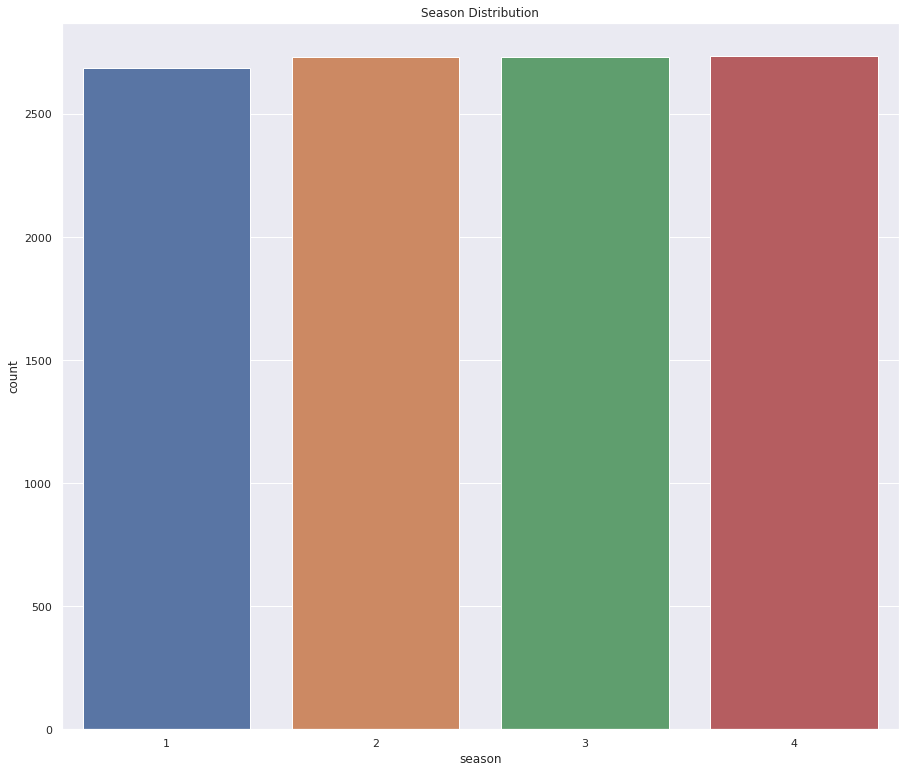

In [ ]:
# Count plot on the Season
sns.countplot(x = 'season' , data = df)
plt.title("Season Distribution")
plt.show()

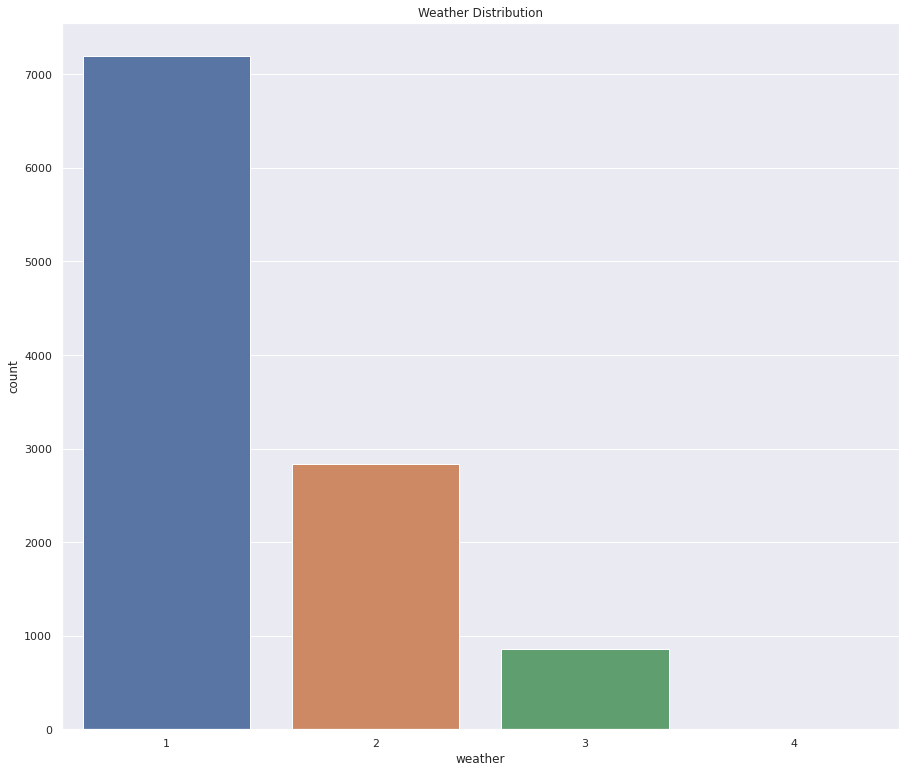

In [ ]:
# Count plot on the Weather
sns.countplot(x = 'weather' , data = df)
plt.title("Weather Distribution")
plt.show()

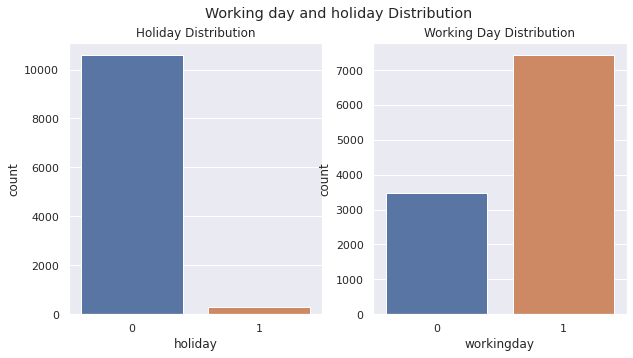

In [ ]:
# Count plot on the Holiday and Working Day
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = 'holiday' , data = df)
plt.title("Holiday Distribution")

plt.subplot(1,2,2)
sns.countplot(x = 'workingday' , data = df)
plt.title("Working Day Distribution")

plt.suptitle("Working day and holiday Distribution")
plt.show()

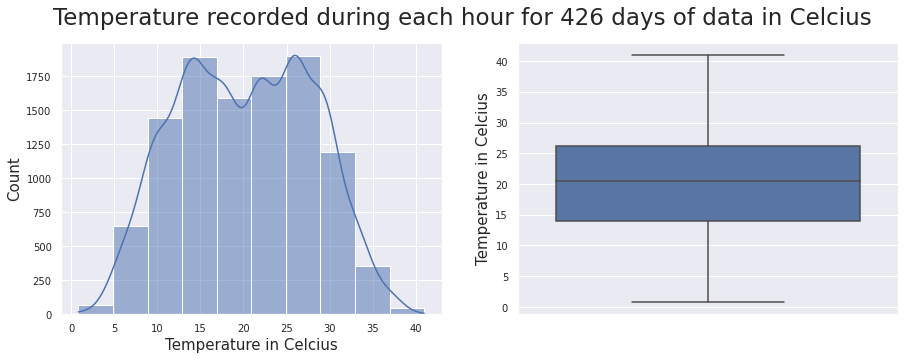

In [ ]:
# Temperature recorded during each hour for 426 days of data in Celcius
# 50% of the temperature lies between 14 - 27 degree Celcius and also the distribution forms a normal distribution
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['temp'] , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Temperature in Celcius' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['temp'])
plt.yticks(fontsize = 10)
plt.ylabel('Temperature in Celcius' , fontsize = 15)

fig.suptitle("Temperature recorded during each hour for 426 days of data in Celcius " , fontsize = 23)
plt.show()

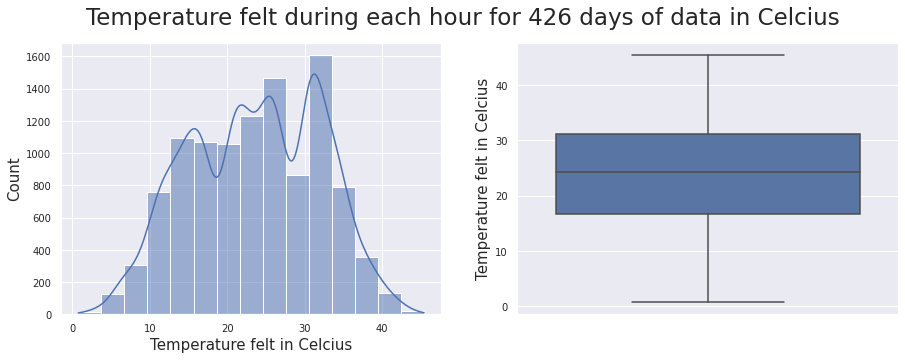

In [ ]:
# Temperature felt during each hour for 426 days of data in Celcius
# 50% of the temperature lies between 17 - 33 degree Celcius and also the distribution forms a normal distribution

fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['atemp'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Temperature felt in Celcius' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['atemp'])
plt.yticks(fontsize = 10)
plt.ylabel('Temperature felt in Celcius' , fontsize = 15)

fig.suptitle("Temperature felt during each hour for 426 days of data in Celcius " , fontsize = 23)
plt.show()

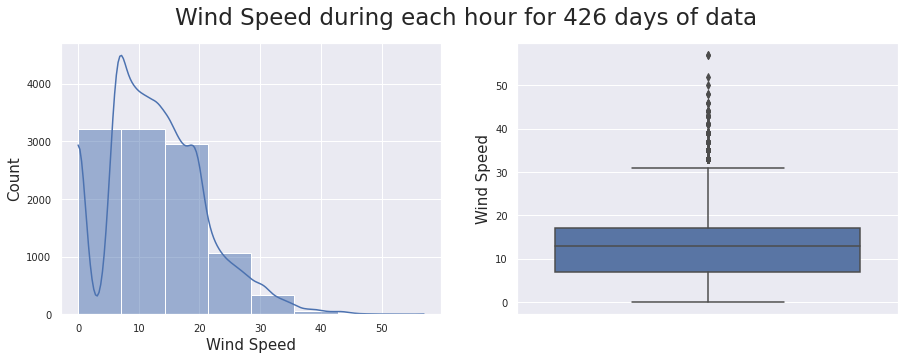

In [ ]:
# Wind Speed during each hour for 426 days of data
# 50% of the wind speed lies between 8 - 17, with outliers above 32
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['windspeed'] , bins = 8 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Wind Speed' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['windspeed'])
plt.yticks(fontsize = 10)
plt.ylabel('Wind Speed' , fontsize = 15)

fig.suptitle("Wind Speed during each hour for 426 days of data" , fontsize = 23)
plt.show()

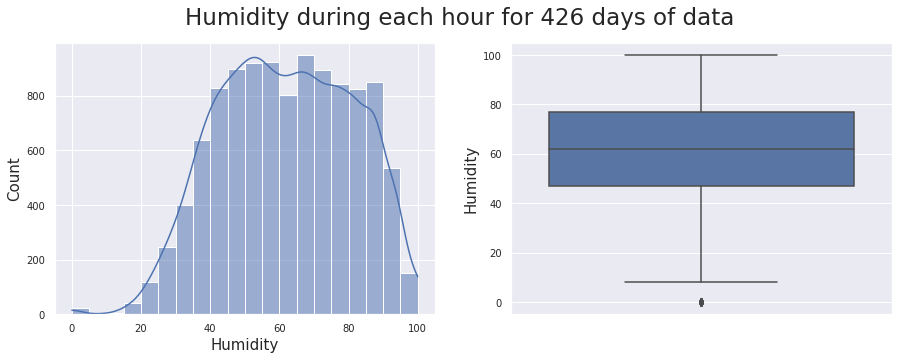

In [ ]:
# Humidity felt during each hour for 426 days of data in Celcius
# 50% of the humidity lies between 44 - 78 with an outlier below 8 and also the distribution forms a normal distribution
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['humidity'] , bins = 20 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Humidity' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['humidity'])
plt.yticks(fontsize = 10)
plt.ylabel('Humidity' , fontsize = 15)

fig.suptitle("Humidity during each hour for 426 days of data" , fontsize = 23)
plt.show()

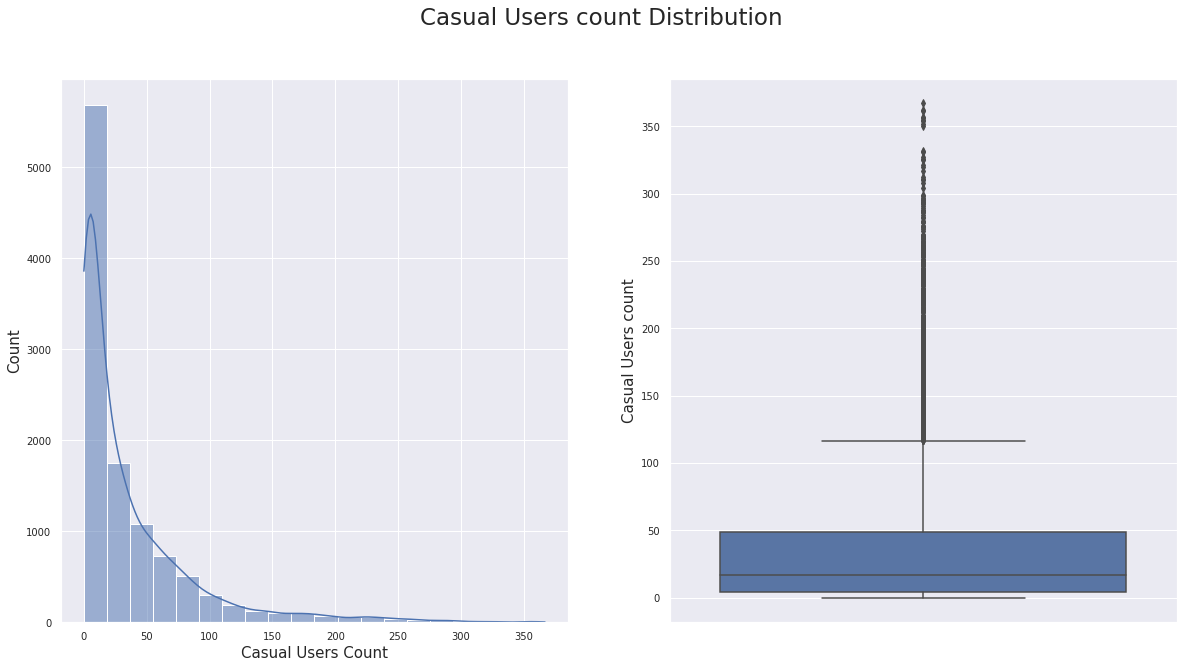

In [ ]:
# Casual Users count Distribution
# 50% of the casual counts lie between 0-50 and a lot of outliers above 120 users
fig = plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.histplot(x = df['casual'] , bins = 20 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['casual'])
plt.yticks(fontsize = 10)
plt.ylabel('Casual Users count' , fontsize = 15)

fig.suptitle("Casual Users count Distribution" , fontsize = 23)
plt.show()

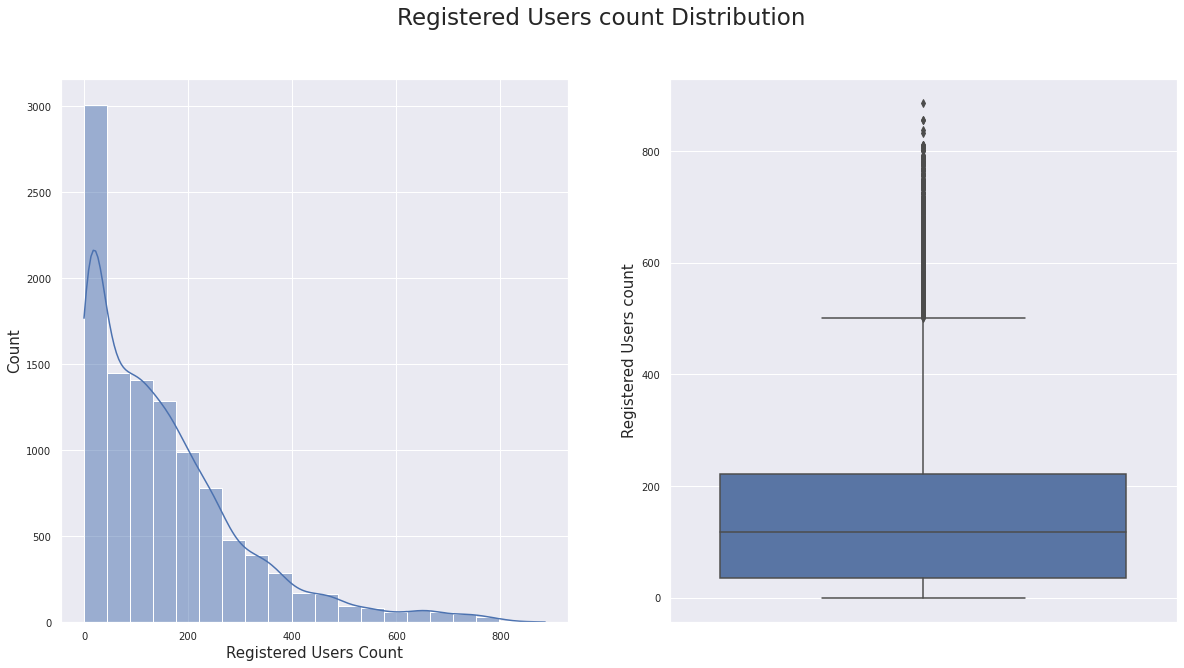

In [ ]:
# Registered Users count Distribution
# 50% of the registered counts lie between 30-220 and a lot of outliers above 520 users
fig = plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.histplot(x = df['registered'] , bins = 20 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['registered'])
plt.yticks(fontsize = 10)
plt.ylabel('Registered Users count' , fontsize = 15)

fig.suptitle("Registered Users count Distribution" , fontsize = 23)
plt.show()

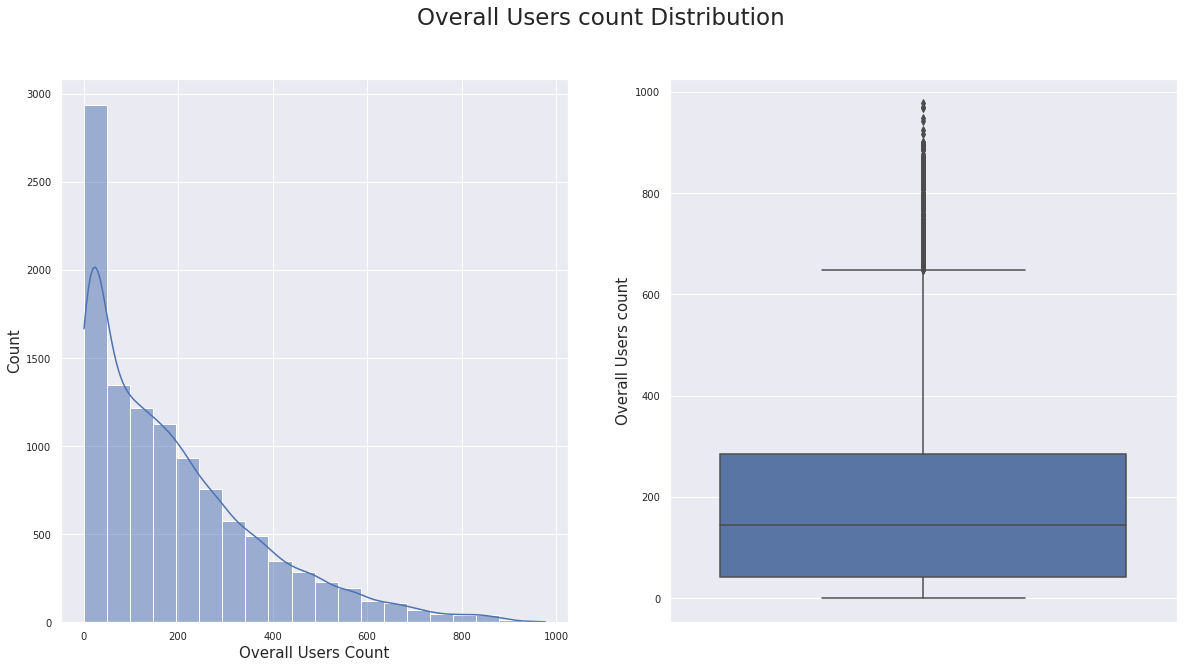

In [ ]:
# Overall count of Users count Distribution
# 50% of the overall counts lie between 30-280 and a lot of outliers above 640 users
fig = plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.histplot(x = df['count'] , bins = 20 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Overall Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['count'])
plt.yticks(fontsize = 10)
plt.ylabel('Overall Users count' , fontsize = 15)

fig.suptitle("Overall Users count Distribution" , fontsize = 23)
plt.show()

#Bivariate and multivariate Visualisation

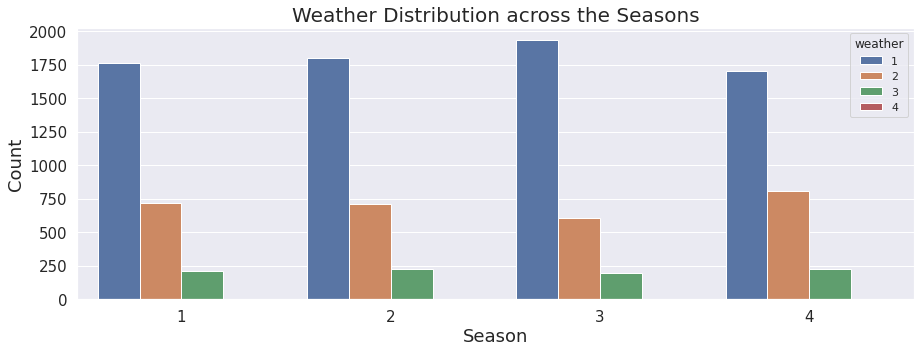

In [ ]:
# Weather Distribution across the Seasons
# Similar kind of distributions for weather across the season with Weather being 1(Clear Sky) mostly, followed by 2(Mist with some clouds) , 3(light rains) and 4(heavy rains)
plt.figure(figsize = (15,5))
sns.countplot(x = 'season' , data = df , hue = 'weather')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Season' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Weather Distribution across the Seasons" , fontsize = 20)
plt.show()

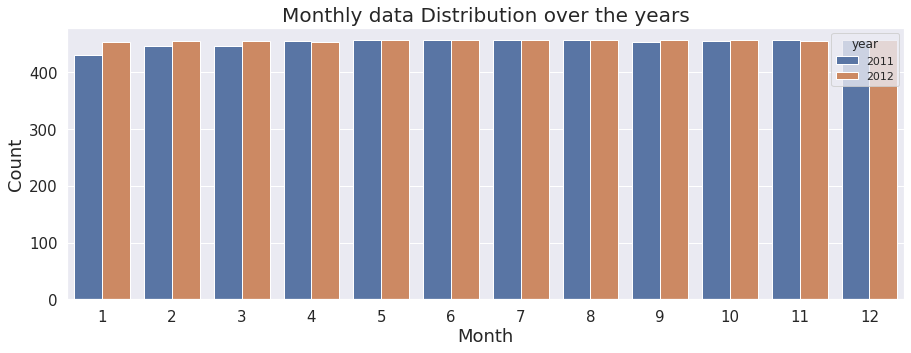

In [ ]:
# Monthly data Distribution over the years
# equal amount of data points collected for the 2 years of data present
plt.figure(figsize = (15,5))
sns.countplot(x = 'month' , data = df , hue = 'year')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Month' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Monthly data Distribution over the years" , fontsize = 20)
plt.show()

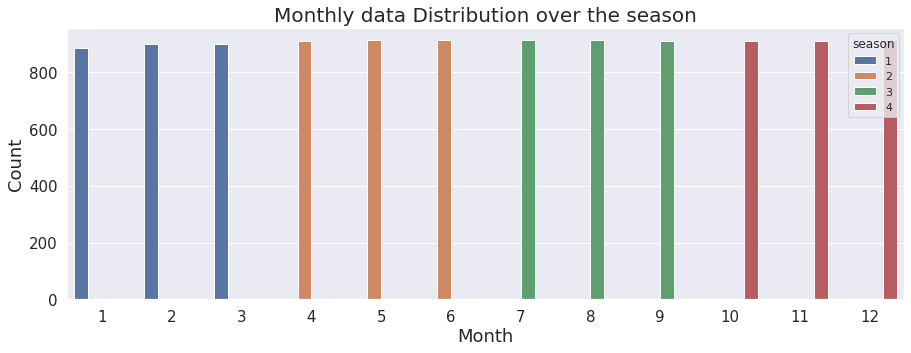

In [ ]:
# Monthly data Distribution over the season
# Jan,Feb,Mar - Spring Season ; Apr,May,Jun - Summer Season ; Jul,Aug,Sep - Fall Season and Oct,Nov,Dec - Winter Season

plt.figure(figsize = (15,5))
sns.countplot(x = 'month' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Month' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Monthly data Distribution over the season" , fontsize = 20)
plt.show()

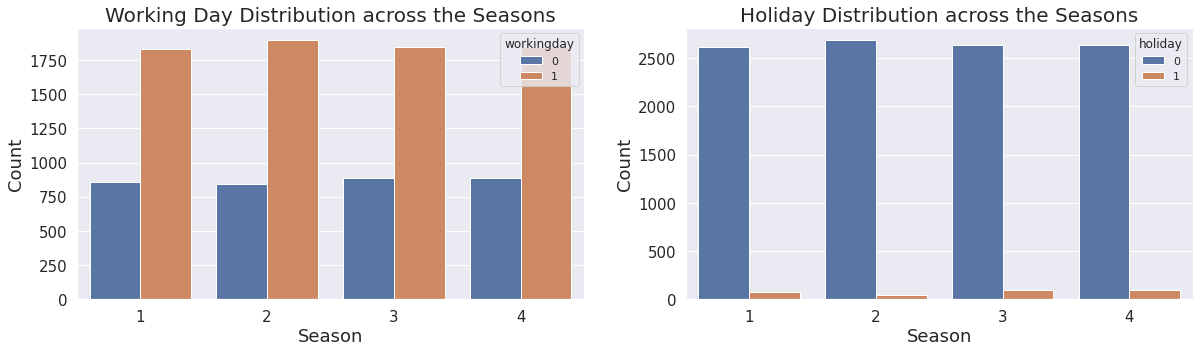

In [ ]:
# Working Day and Holiday Distribution across the Seasons
# Working Days to holiday is in the ratio of almost 2:3 across the seasons
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x = 'season' , data = df , hue = 'workingday')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Season' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Working Day Distribution across the Seasons" , fontsize = 20)

plt.subplot(1,2,2)
sns.countplot(x = 'season' , data = df , hue = 'holiday')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Season' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Holiday Distribution across the Seasons" , fontsize = 20)

plt.show()

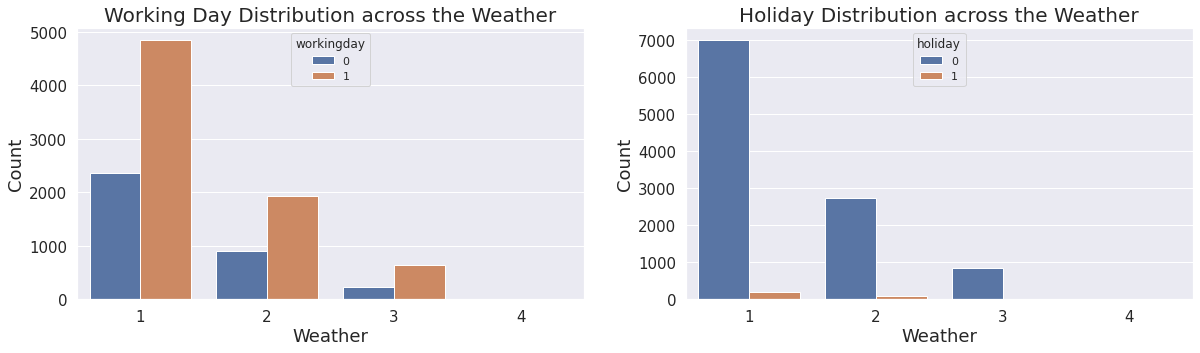

In [ ]:
# Working Day and Holiday Distribution across the Weather
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x = 'weather' , data = df , hue = 'workingday')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Weather' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Working Day Distribution across the Weather" , fontsize = 20)

plt.subplot(1,2,2)
sns.countplot(x = 'weather' , data = df , hue = 'holiday')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Weather' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Holiday Distribution across the Weather" , fontsize = 20)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


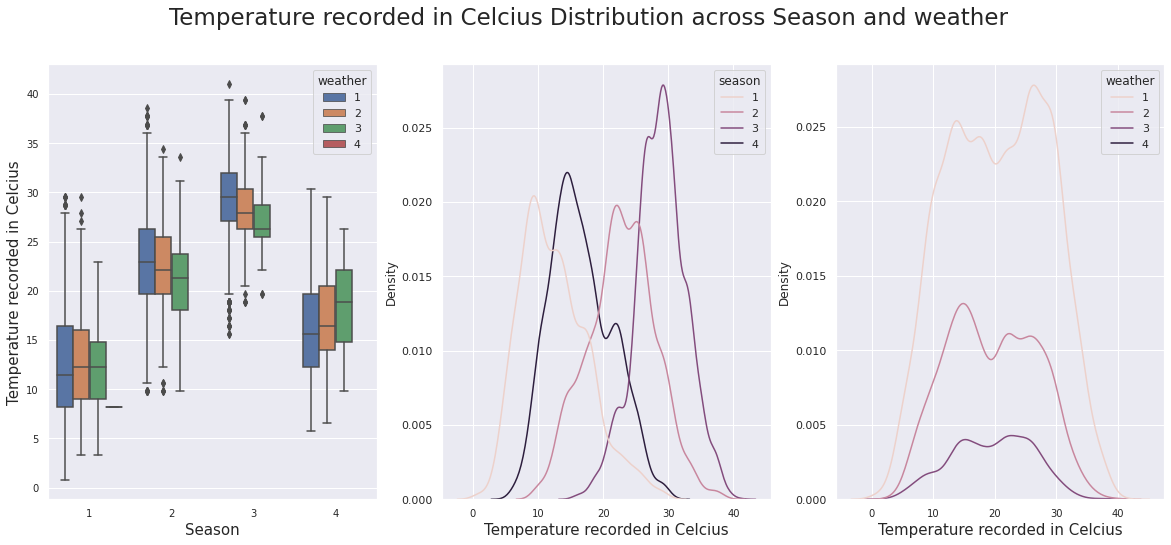

In [ ]:
#Temperature recorded in Celcius Distribution across Season and weather
# Median Temperatures recorded from highest to lowset for seasons(50% value range in paranthesis) : Fall (26-33) > Summer (19-26) > Winter (12-22) > Spring (8-16)
# Outliers in temperatures are recorded during spring, fall and summer

fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'temp' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Temperature recorded in Celcius' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'temp' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Temperature recorded in Celcius' , fontsize = 15)

plt.subplot(1,3,3)
sns.kdeplot(x = 'temp' , data = df , hue = 'weather')
plt.xticks(fontsize = 10)
plt.xlabel('Temperature recorded in Celcius' , fontsize = 15)

fig.suptitle("Temperature recorded in Celcius Distribution across Season and weather" , fontsize = 23)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


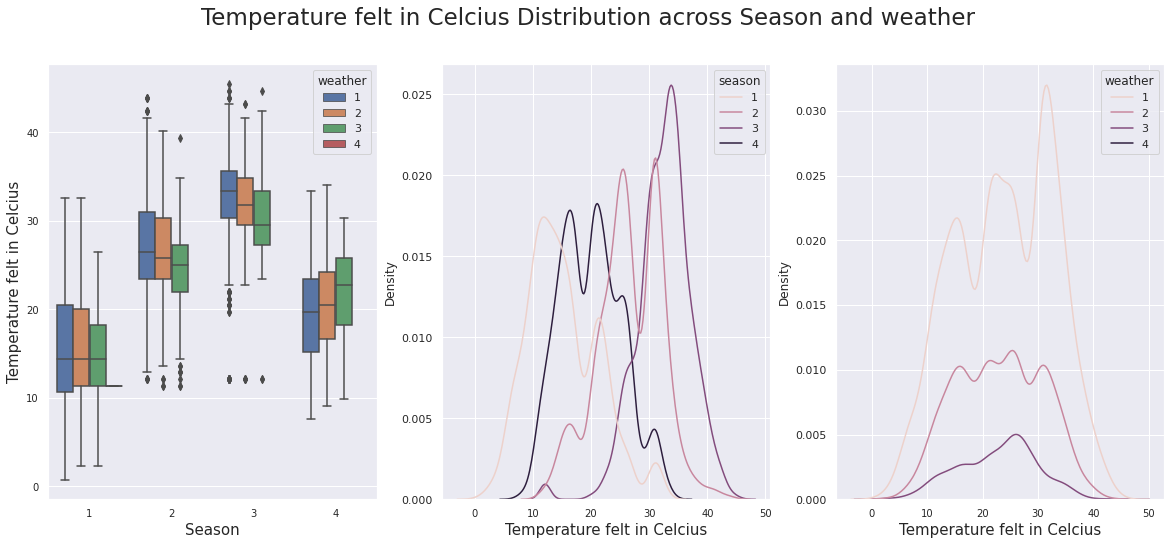

In [ ]:
#Temperature felt in Celcius Distribution across Season and weather
# Similar to the Temperature recorded with value ranges stretched at lower and higher bounds

fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'atemp' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Temperature felt in Celcius' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'atemp' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Temperature felt in Celcius' , fontsize = 15)

plt.subplot(1,3,3)
sns.kdeplot(x = 'atemp' , data = df , hue = 'weather')
plt.xticks(fontsize = 10)
plt.xlabel('Temperature felt in Celcius' , fontsize = 15)

fig.suptitle("Temperature felt in Celcius Distribution across Season and weather" , fontsize = 23)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


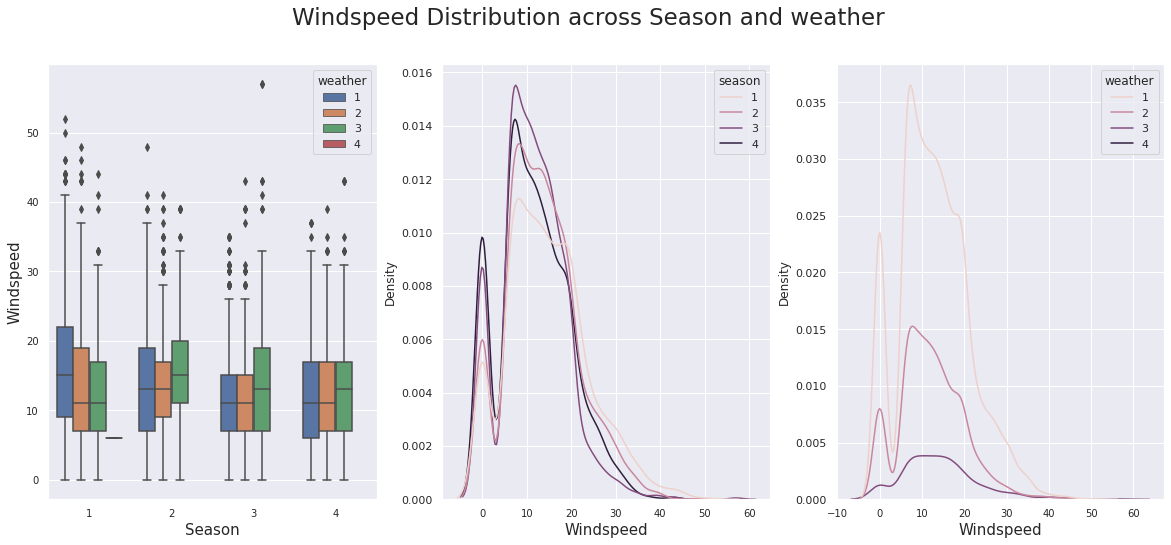

In [ ]:
#Windspeed Distribution across Season and weather
# Almost similar median values of windspeed(11-14) with values during spring having wider range of wind speeds and almost a constant and lower during winter

fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'windspeed' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Windspeed' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'windspeed' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Windspeed' , fontsize = 15)

plt.subplot(1,3,3)
sns.kdeplot(x = 'windspeed' , data = df , hue = 'weather')
plt.xticks(fontsize = 10)
plt.xlabel('Windspeed' , fontsize = 15)

fig.suptitle("Windspeed Distribution across Season and weather" , fontsize = 23)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


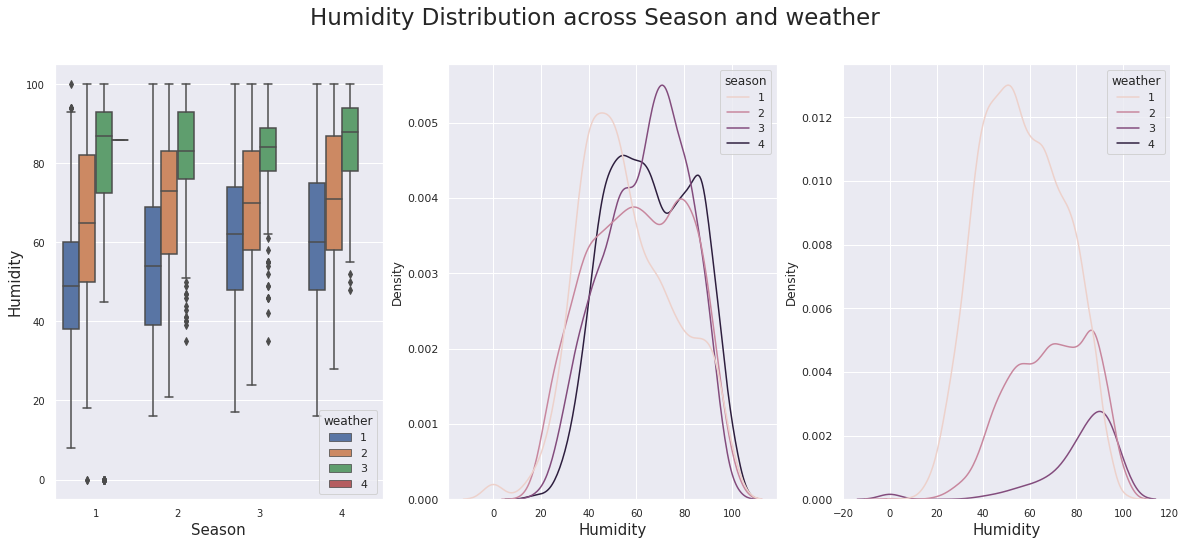

In [ ]:
# Humidity Distribution across Season and weather
# Almost similar ranges seen across the seasons and weather and as expected humidity is more during rainy days compared to when sky is clear.
# Median 50% Range across weather :-  1 : 40-60 , 2 : 50-80 , 3 :  75-95
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'humidity' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Humidity' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'humidity' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Humidity' , fontsize = 15)

plt.subplot(1,3,3)
sns.kdeplot(x = 'humidity' , data = df , hue = 'weather')
plt.xticks(fontsize = 10)
plt.xlabel('Humidity' , fontsize = 15)

fig.suptitle("Humidity Distribution across Season and weather" , fontsize = 23)
plt.show()

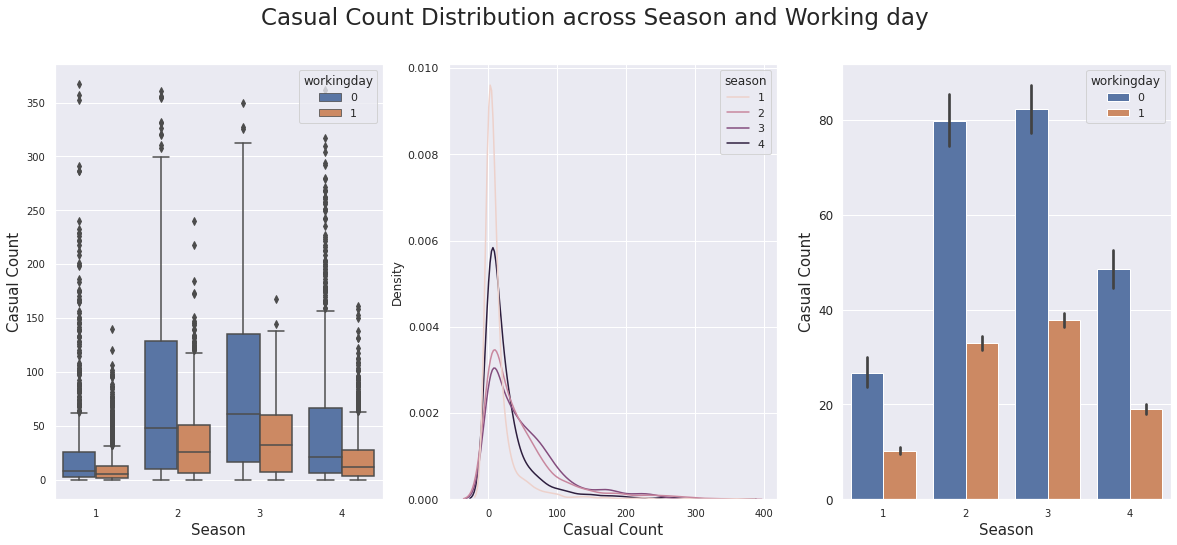

In [ ]:
# Casual Count Distribution across Season and Working day
# Casual Counts as expected are more during the non-working days and more users during the Summer and Fall and comparitively less during the Spring and Winter
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'casual' , data = df , x = 'season' , hue='workingday')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'casual' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Casual Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'casual' , data = df , x = 'season' , hue = 'workingday' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)

fig.suptitle("Casual Count Distribution across Season and Working day" , fontsize = 23)
plt.show()

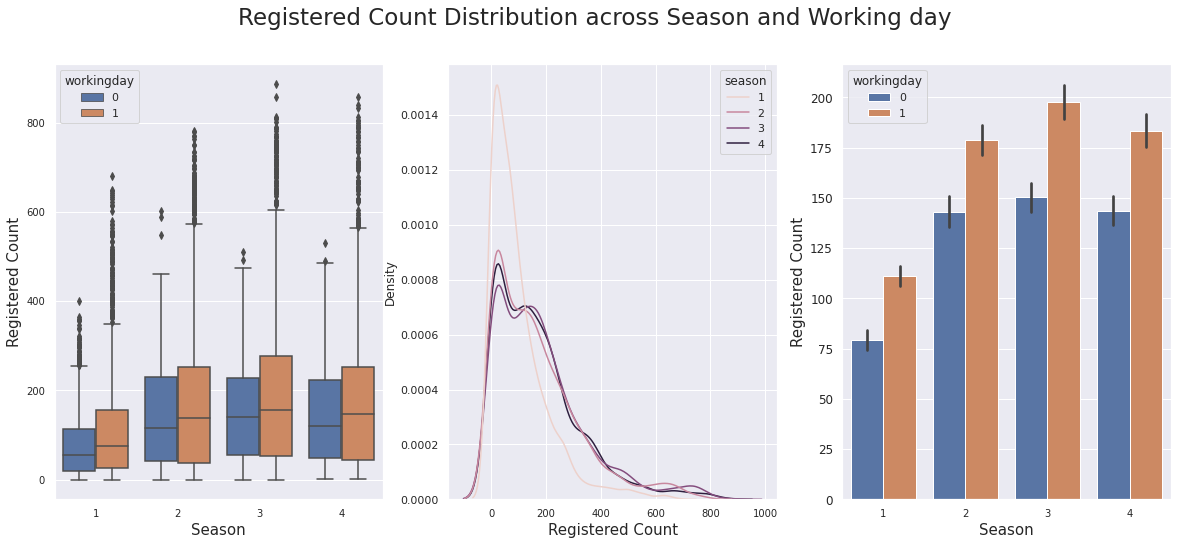

In [ ]:
# Registered Count Distribution across Season and Working day
# Registered Count is having 3:4 ratio of user during a non-working:working day and is almost similar during the summer,fall and winter and less during the Spring
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'registered' , data = df , x = 'season' , hue='workingday')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'registered' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Registered Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'registered' , data = df , x = 'season' , hue = 'workingday' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)

fig.suptitle("Registered Count Distribution across Season and Working day" , fontsize = 23)
plt.show()

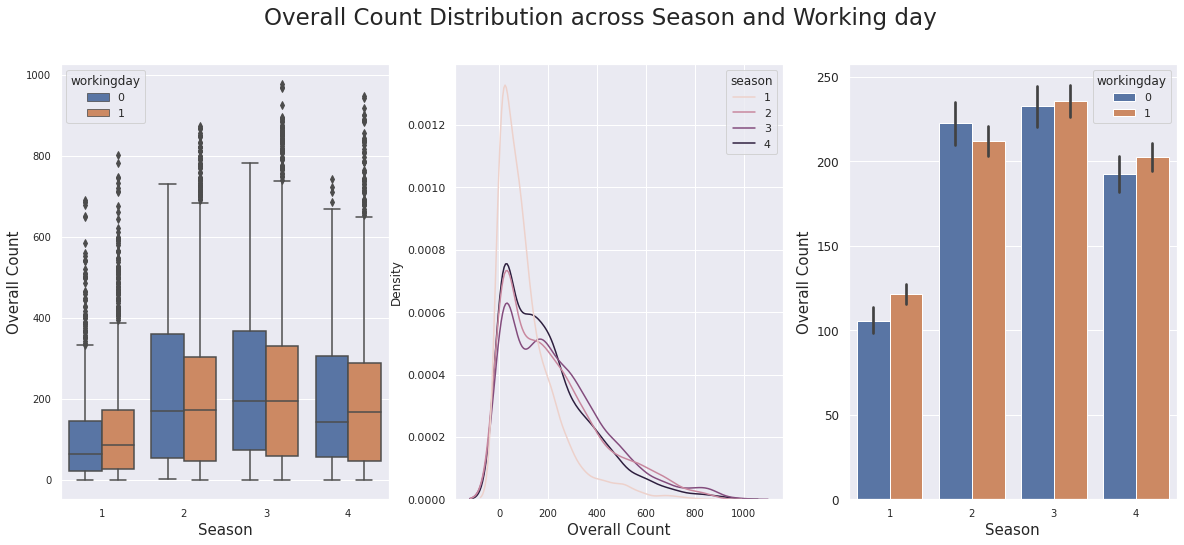

In [ ]:
# Overall Count Distribution across Season and Working day
# Overall Count is having 3:4 ratio of user during a non-working:working day and is almost similar during the summer,fall and winter and less during the Spring
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'count' , data = df , x = 'season' , hue='workingday')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'count' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Overall Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'count' , data = df , x = 'season' , hue = 'workingday' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)

fig.suptitle("Overall Count Distribution across Season and Working day" , fontsize = 23)
plt.show()

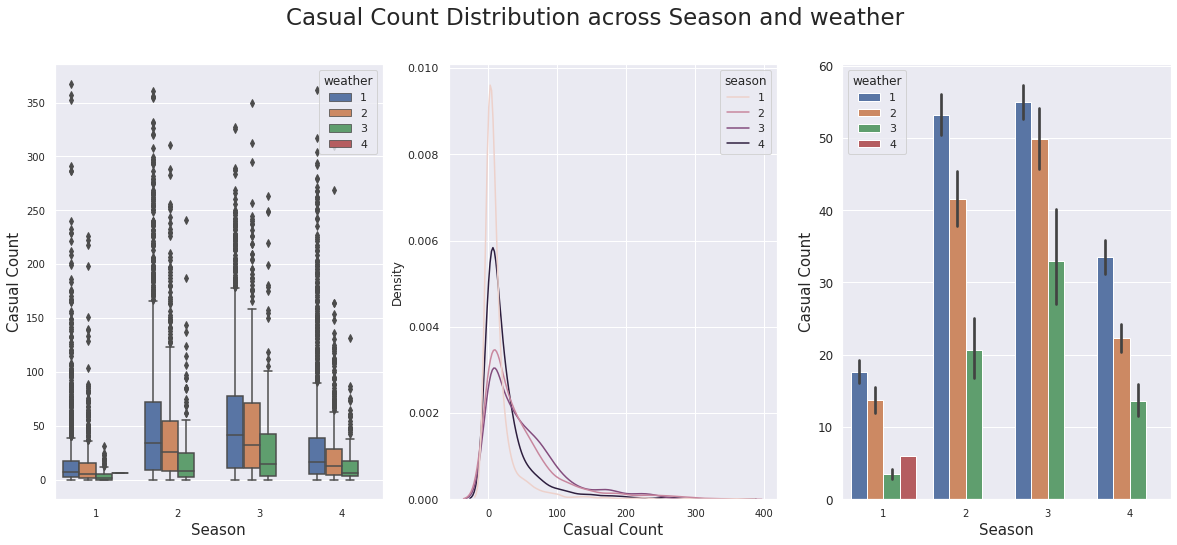

In [ ]:
# Casual count Distribution across Season and weather
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'casual' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'casual' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Casual Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'casual' , data = df , x = 'season' , hue = 'weather' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)

fig.suptitle("Casual Count Distribution across Season and weather" , fontsize = 23)
plt.show()

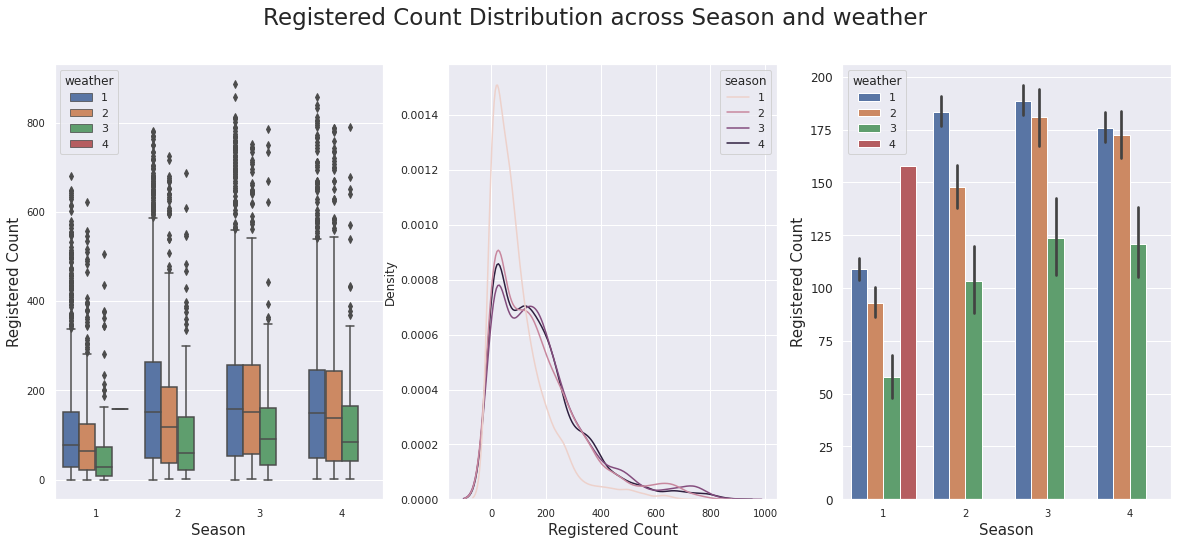

In [ ]:
# Registered count Distribution across Season and weather
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'registered' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'registered' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Registered Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'registered' , data = df , x = 'season' , hue = 'weather' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)

fig.suptitle("Registered Count Distribution across Season and weather" , fontsize = 23)
plt.show()

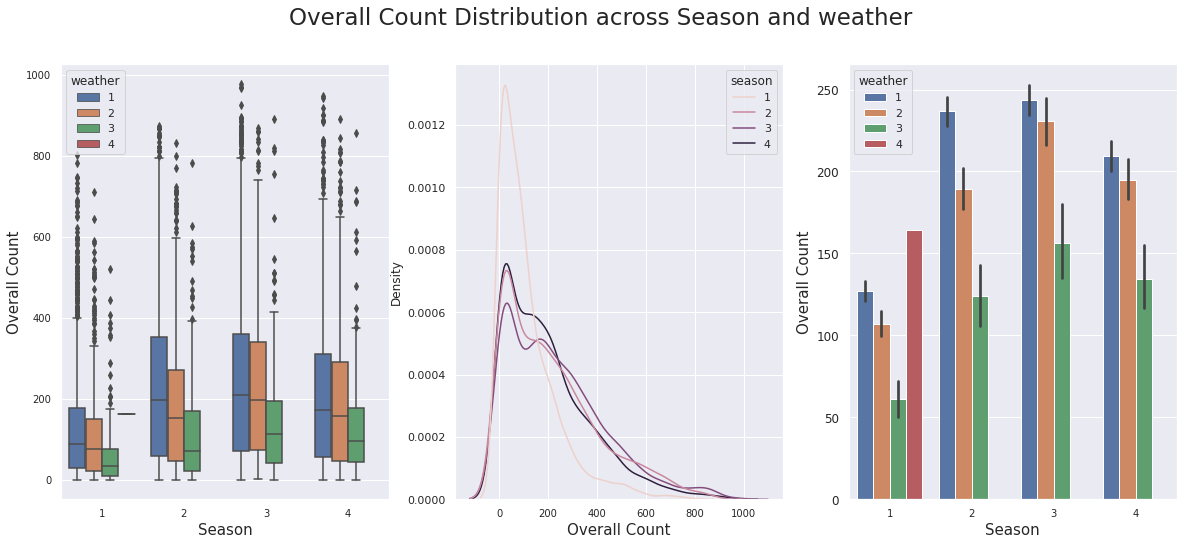

In [ ]:
# Overall count Distribution across Season and weather
fig = plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'count' , data = df , x = 'season' , hue = 'weather')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'count' , data = df , hue = 'season')
plt.xticks(fontsize = 10)
plt.xlabel('Overall Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'count' , data = df , x = 'season' , hue = 'weather' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Season' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)

fig.suptitle("Overall Count Distribution across Season and weather" , fontsize = 23)
plt.show()

In [ ]:
df_day = df.groupby(['day','month','year'])['casual','registered','count'].sum()
df_day.reset_index(inplace =True)
df_day

<ipython-input-258-a2ab778f51df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_day = df.groupby(['day','month','year'])['casual','registered','count'].sum()


day  month  year  casual  registered  count
0      1      1  2011     331         654    985
1      1      1  2012     686        1608   2294
2      1      2  2011      47        1313   1360
3      1      2  2012     304        4275   4579
4      1      3  2011     137        1714   1851
..   ...    ...   ...     ...         ...    ...
451   19     10  2012     753        4671   5424
452   19     11  2011     943        2720   3663
453   19     11  2012     449        5050   5499
454   19     12  2011     260        3143   3403
455   19     12  2012     333        4934   5267

[456 rows x 6 columns]

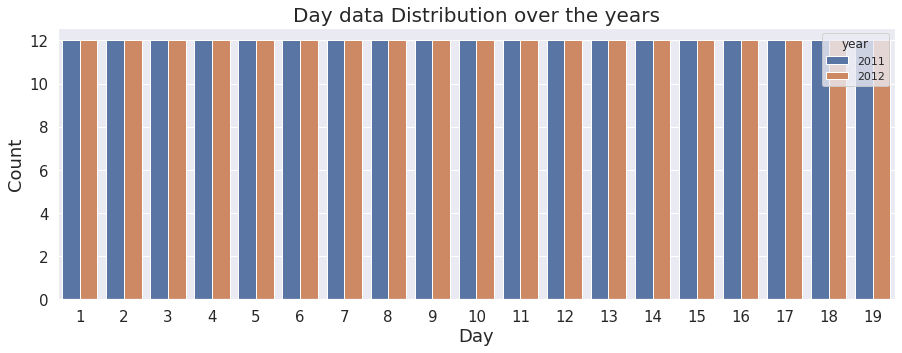

In [ ]:
# Day data Distribution over the years
# Data is collected from the first 19 days of every month for the years 2011 and 2012

plt.figure(figsize = (15,5))
sns.countplot(x = 'day' , data = df_day , hue = 'year')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Day' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Day data Distribution over the years" , fontsize = 20)
plt.show()

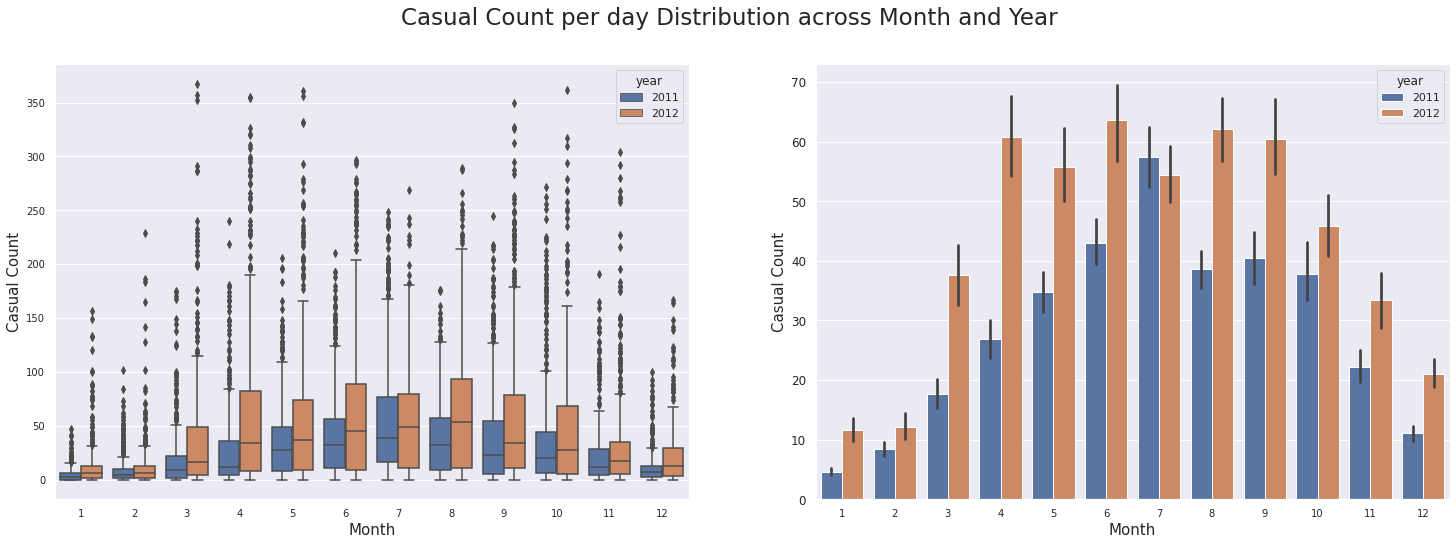

In [ ]:
# Casual Count per day Distribution across Month and Year
# Casual users count seems to be similar from April to September and the Counts are more in 2012 than the previous year 2011

fig = plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'casual' , data = df , x = 'month' , hue = 'year')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(y = 'casual' , data = df , x = 'month' , hue = 'year' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)

fig.suptitle("Casual Count per day Distribution across Month and Year" , fontsize = 23)
plt.show()

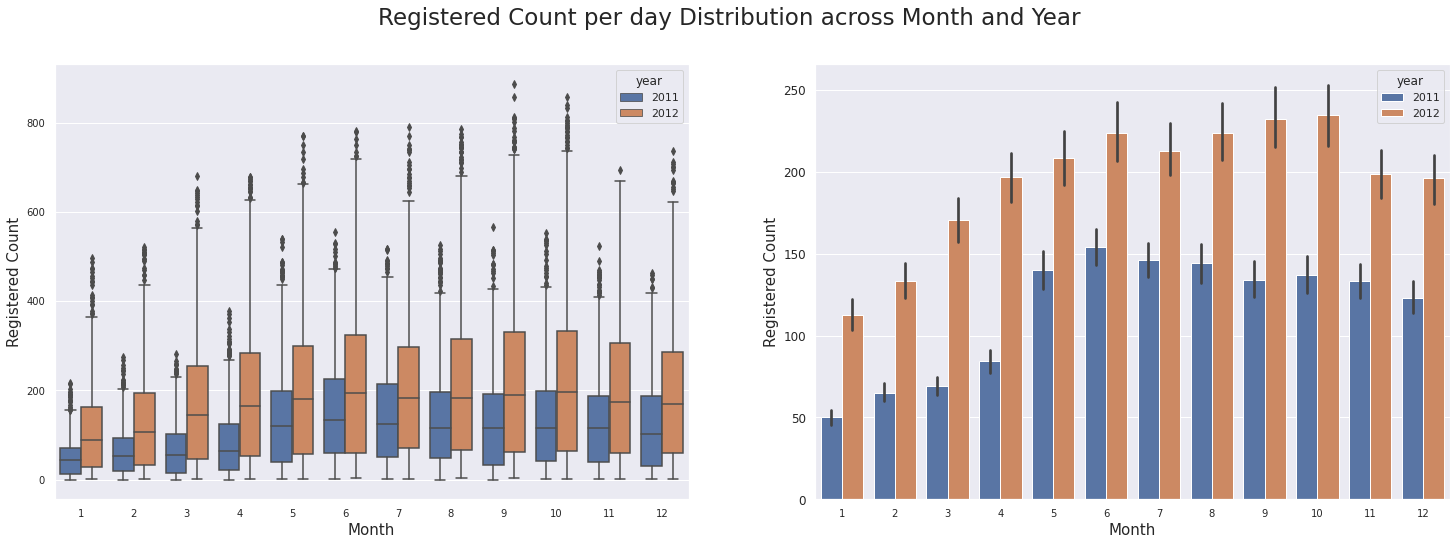

In [ ]:
# Registered Count per day Distribution across Month and Year
# Registered users count is increasing from January to April and a constant from June to October and a drop during November and December

fig = plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'registered' , data = df , x = 'month' , hue = 'year')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(y = 'registered' , data = df , x = 'month' , hue = 'year' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)

fig.suptitle("Registered Count per day Distribution across Month and Year" , fontsize = 23)
plt.show()

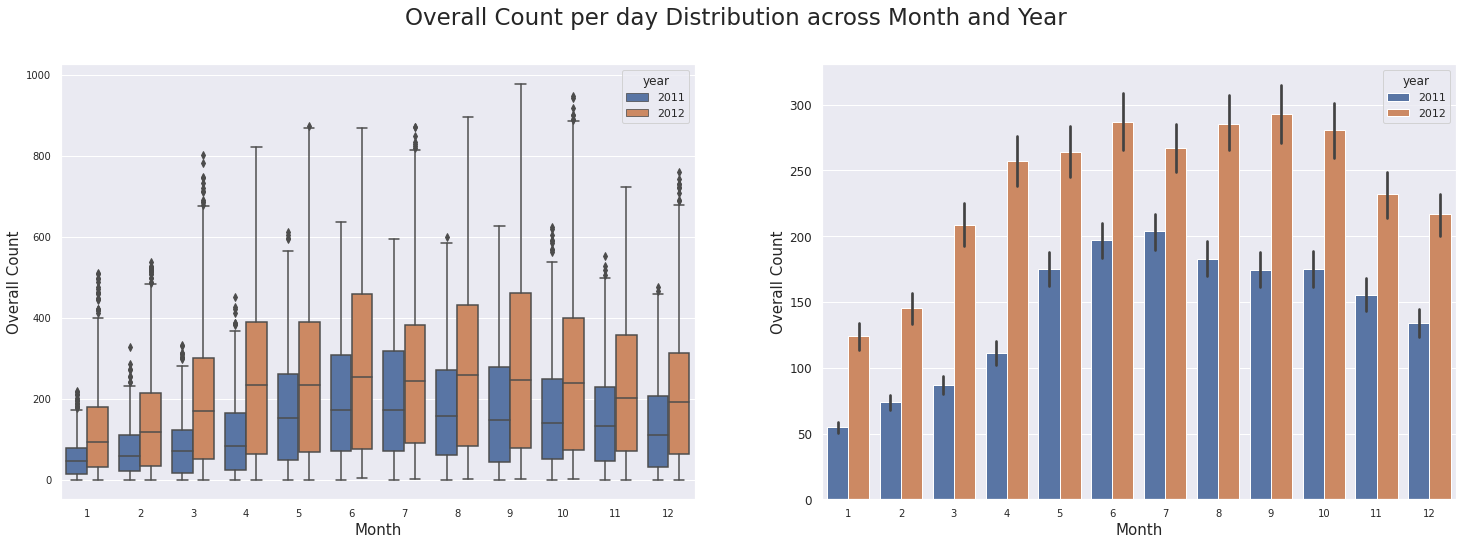

In [ ]:
#Overall Count per day Distribution across Month and Year

fig = plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'count' , data = df , x = 'month' , hue = 'year')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(y = 'count' , data = df , x = 'month' , hue = 'year' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)

fig.suptitle("Overall Count per day Distribution across Month and Year" , fontsize = 23)
plt.show()

<ipython-input-263-f5056c62ffe3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = df_day.groupby(['month','year'])['casual','registered','count'].sum()


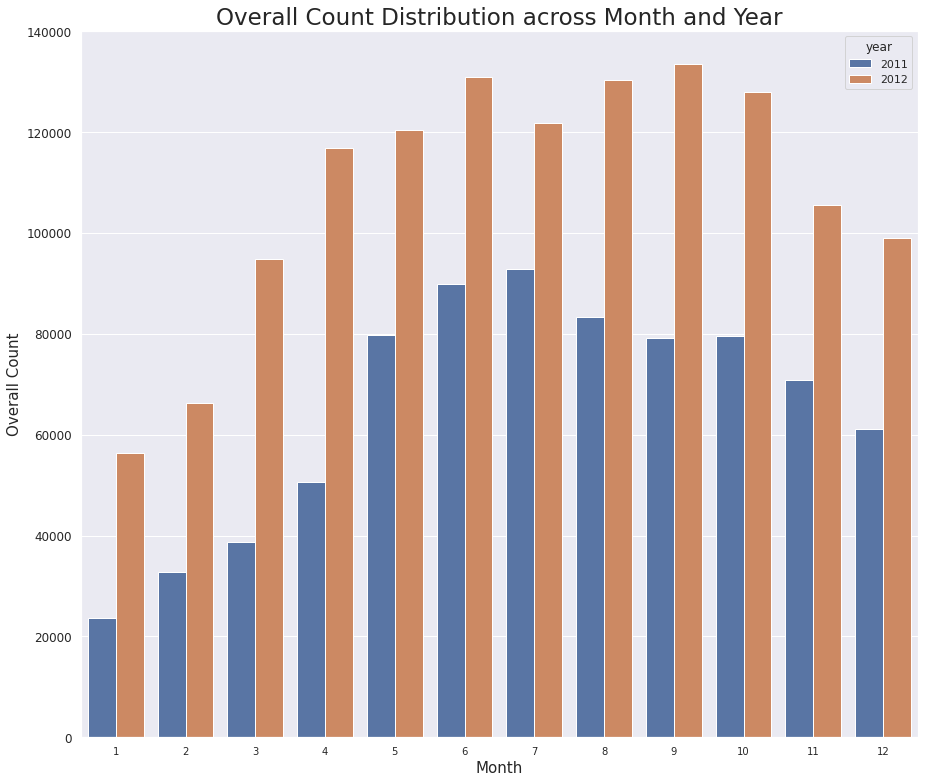

In [ ]:
# Overall Count Distribution across Month and Year

df_new = df_day.groupby(['month','year'])['casual','registered','count'].sum()
df_new.reset_index(inplace = True)
sns.barplot(y = 'count' , data = df_new , x = 'month' , hue = 'year')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Overall Count' , fontsize = 15)
plt.title("Overall Count Distribution across Month and Year" , fontsize = 23)
plt.show()

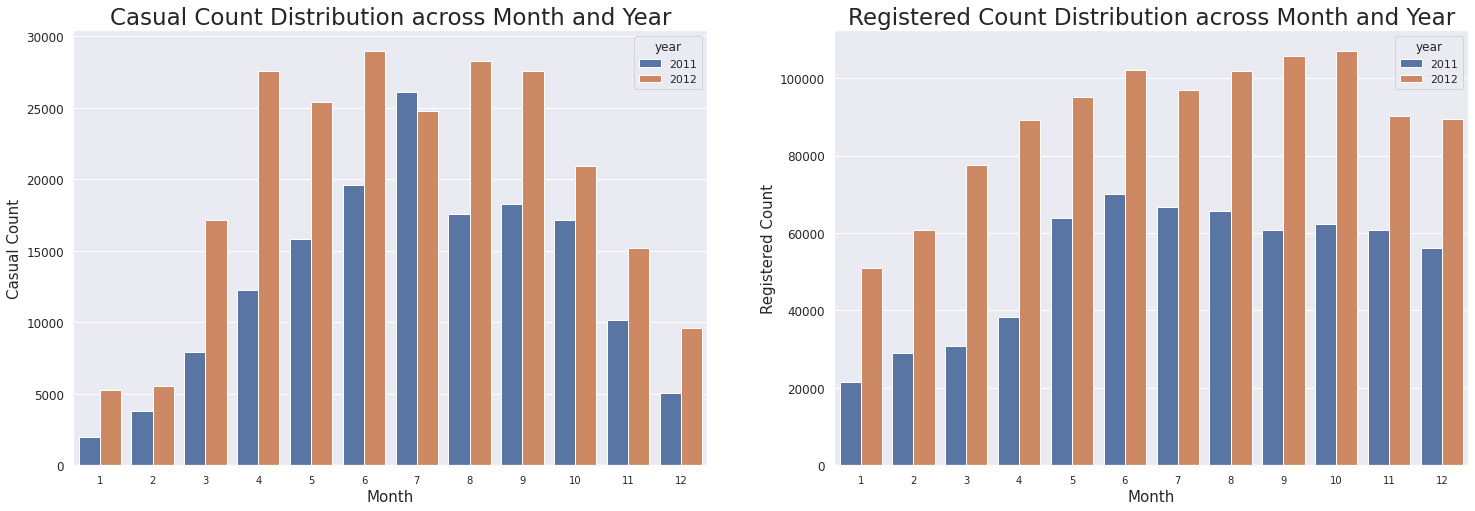

In [ ]:
# Casual and Registered users Count Distribution across Month and Year
fig = plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.barplot(y = 'casual' , data = df_new , x = 'month' , hue = 'year')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Casual Count' , fontsize = 15)
plt.title("Casual Count Distribution across Month and Year" , fontsize = 23)

plt.subplot(1,2,2)
sns.barplot(y = 'registered' , data = df_new , x = 'month' , hue = 'year')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Month' , fontsize = 15)
plt.ylabel('Registered Count' , fontsize = 15)
plt.title("Registered Count Distribution across Month and Year" , fontsize = 23)

plt.show()

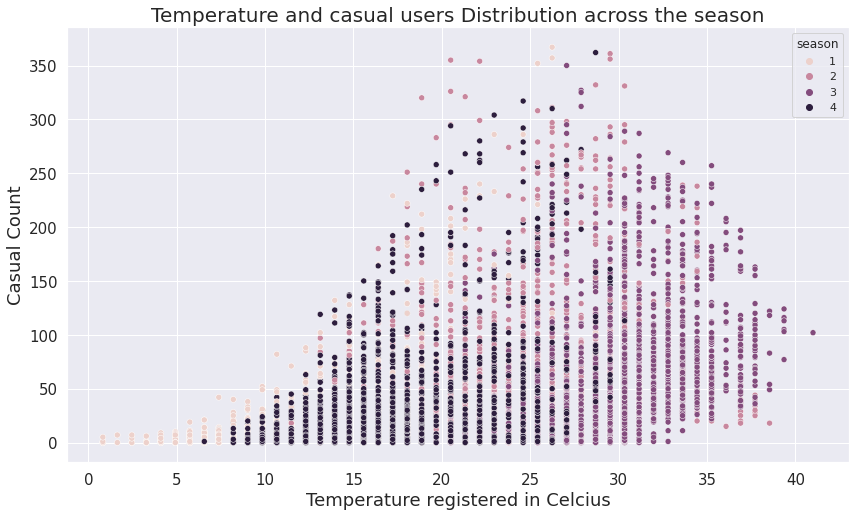

In [ ]:
# Temperature and casual count Distribution across the season

plt.figure(figsize = (14,8))
sns.scatterplot(x = 'temp' , y = 'casual' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Temperature registered in Celcius' , fontsize = 18)
plt.ylabel('Casual Count' , fontsize = 18)
plt.title("Temperature and casual users Distribution across the season" , fontsize = 20)
plt.show()

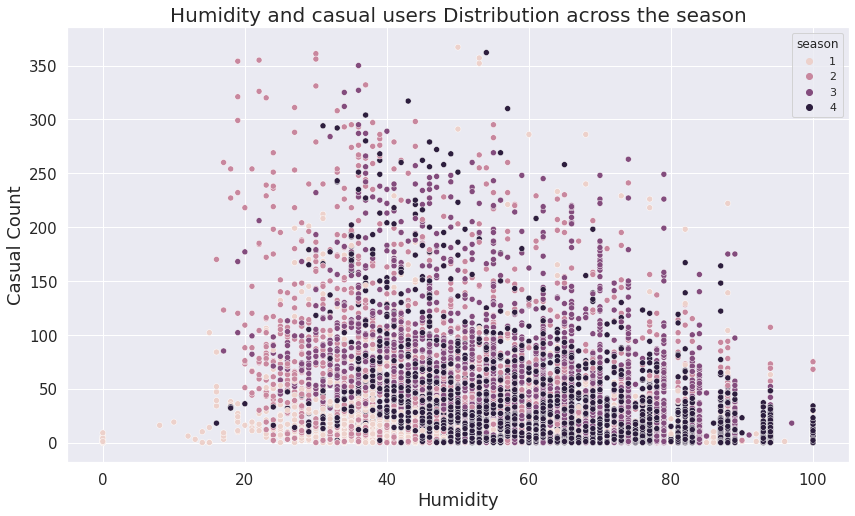

In [ ]:
# Humidity and casual count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'humidity' , y = 'casual' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Humidity' , fontsize = 18)
plt.ylabel('Casual Count' , fontsize = 18)
plt.title("Humidity and casual users Distribution across the season" , fontsize = 20)
plt.show()

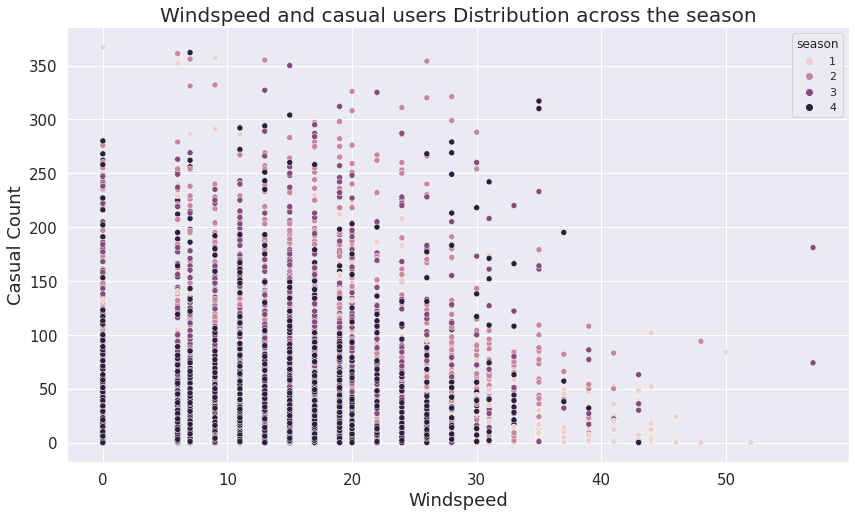

In [ ]:
# Windspeed and casual count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'windspeed' , y = 'casual' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Windspeed' , fontsize = 18)
plt.ylabel('Casual Count' , fontsize = 18)
plt.title("Windspeed and casual users Distribution across the season" , fontsize = 20)
plt.show()

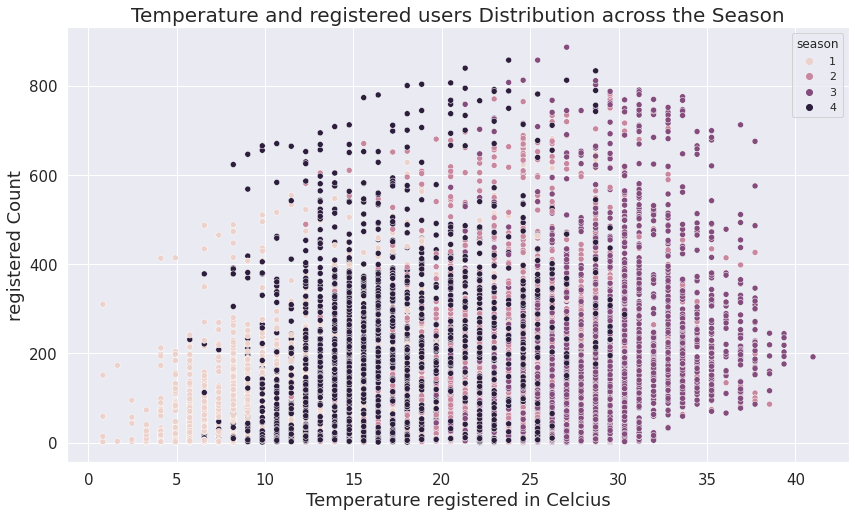

In [ ]:
# Temperature and registered count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'temp' , y = 'registered' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Temperature registered in Celcius' , fontsize = 18)
plt.ylabel('registered Count' , fontsize = 18)
plt.title("Temperature and registered users Distribution across the Season" , fontsize = 20)
plt.show()

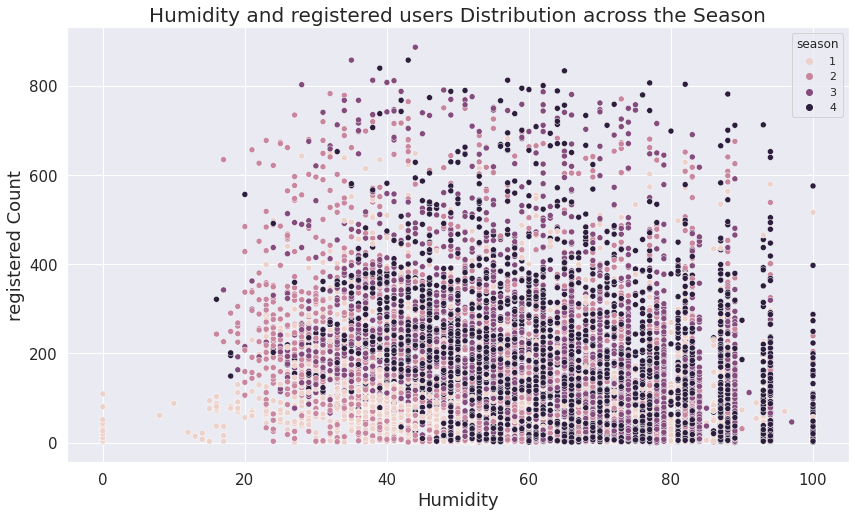

In [ ]:
# Humidity and registered count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'humidity' , y = 'registered' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Humidity' , fontsize = 18)
plt.ylabel('registered Count' , fontsize = 18)
plt.title("Humidity and registered users Distribution across the Season" , fontsize = 20)
plt.show()

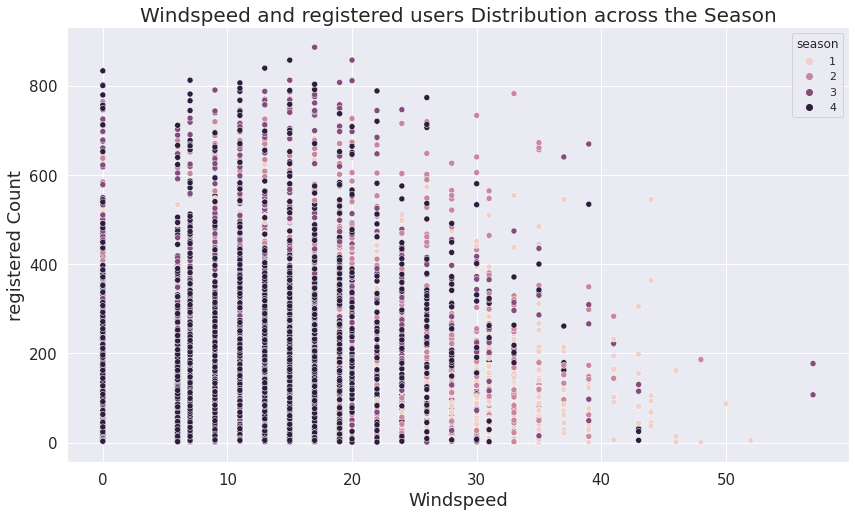

In [ ]:
# Windspeed and registered count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'windspeed' , y = 'registered' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Windspeed' , fontsize = 18)
plt.ylabel('registered Count' , fontsize = 18)
plt.title("Windspeed and registered users Distribution across the Season" , fontsize = 20)
plt.show()

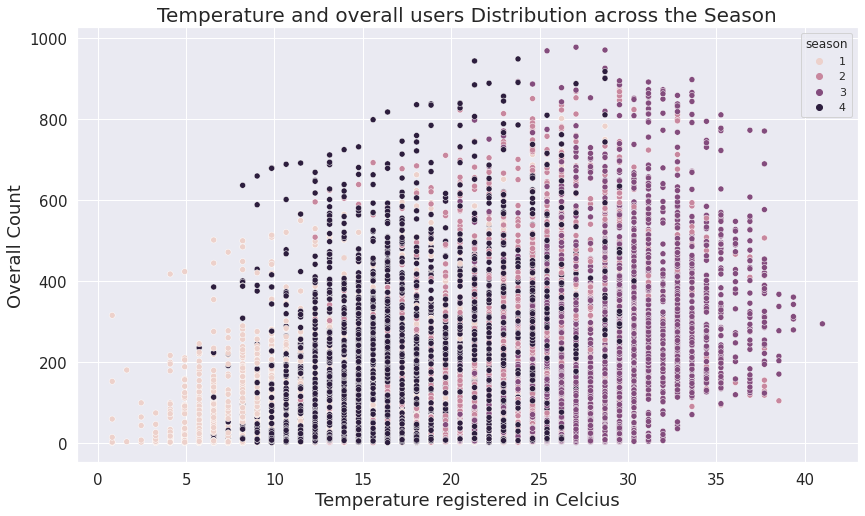

In [ ]:
# Temperature and Overall count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'temp' , y = 'count' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Temperature registered in Celcius' , fontsize = 18)
plt.ylabel('Overall Count' , fontsize = 18)
plt.title("Temperature and overall users Distribution across the Season" , fontsize = 20)
plt.show()

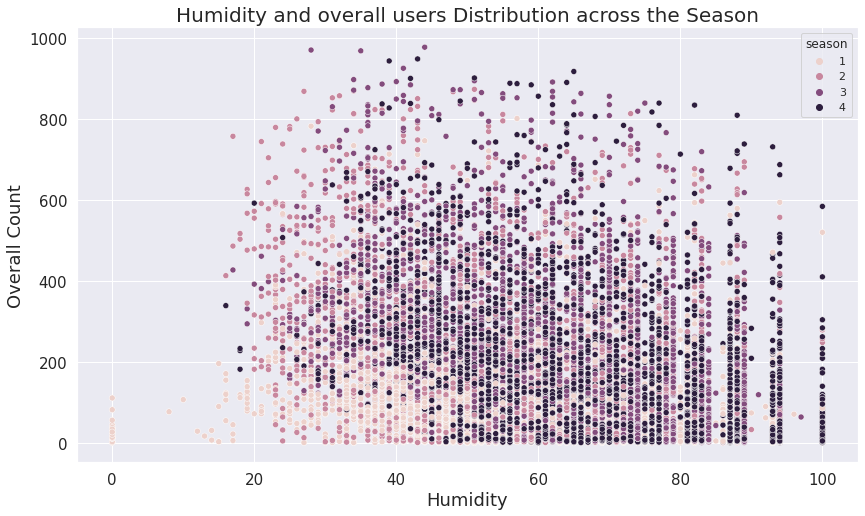

In [ ]:
# Humidity and Overall count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'humidity' , y = 'count' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Humidity' , fontsize = 18)
plt.ylabel('Overall Count' , fontsize = 18)
plt.title("Humidity and overall users Distribution across the Season" , fontsize = 20)
plt.show()

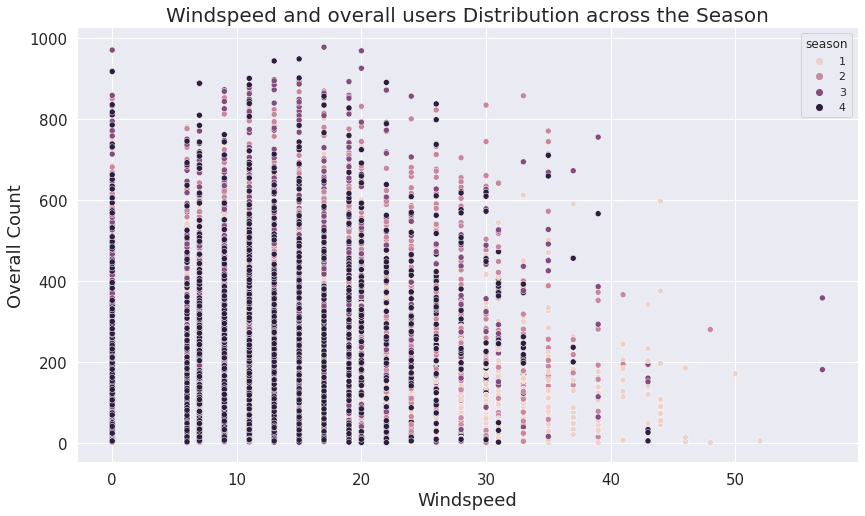

In [ ]:
# Windspeed and Overall count Distribution across the season
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'windspeed' , y = 'count' , data = df , hue = 'season')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Windspeed' , fontsize = 18)
plt.ylabel('Overall Count' , fontsize = 18)
plt.title("Windspeed and overall users Distribution across the Season" , fontsize = 20)
plt.show()

# Correlation - heatmaps & pairplots

In [ ]:
da = df.copy()
da.drop(['day','month','year','date','time'] , axis = 1 , inplace = True)

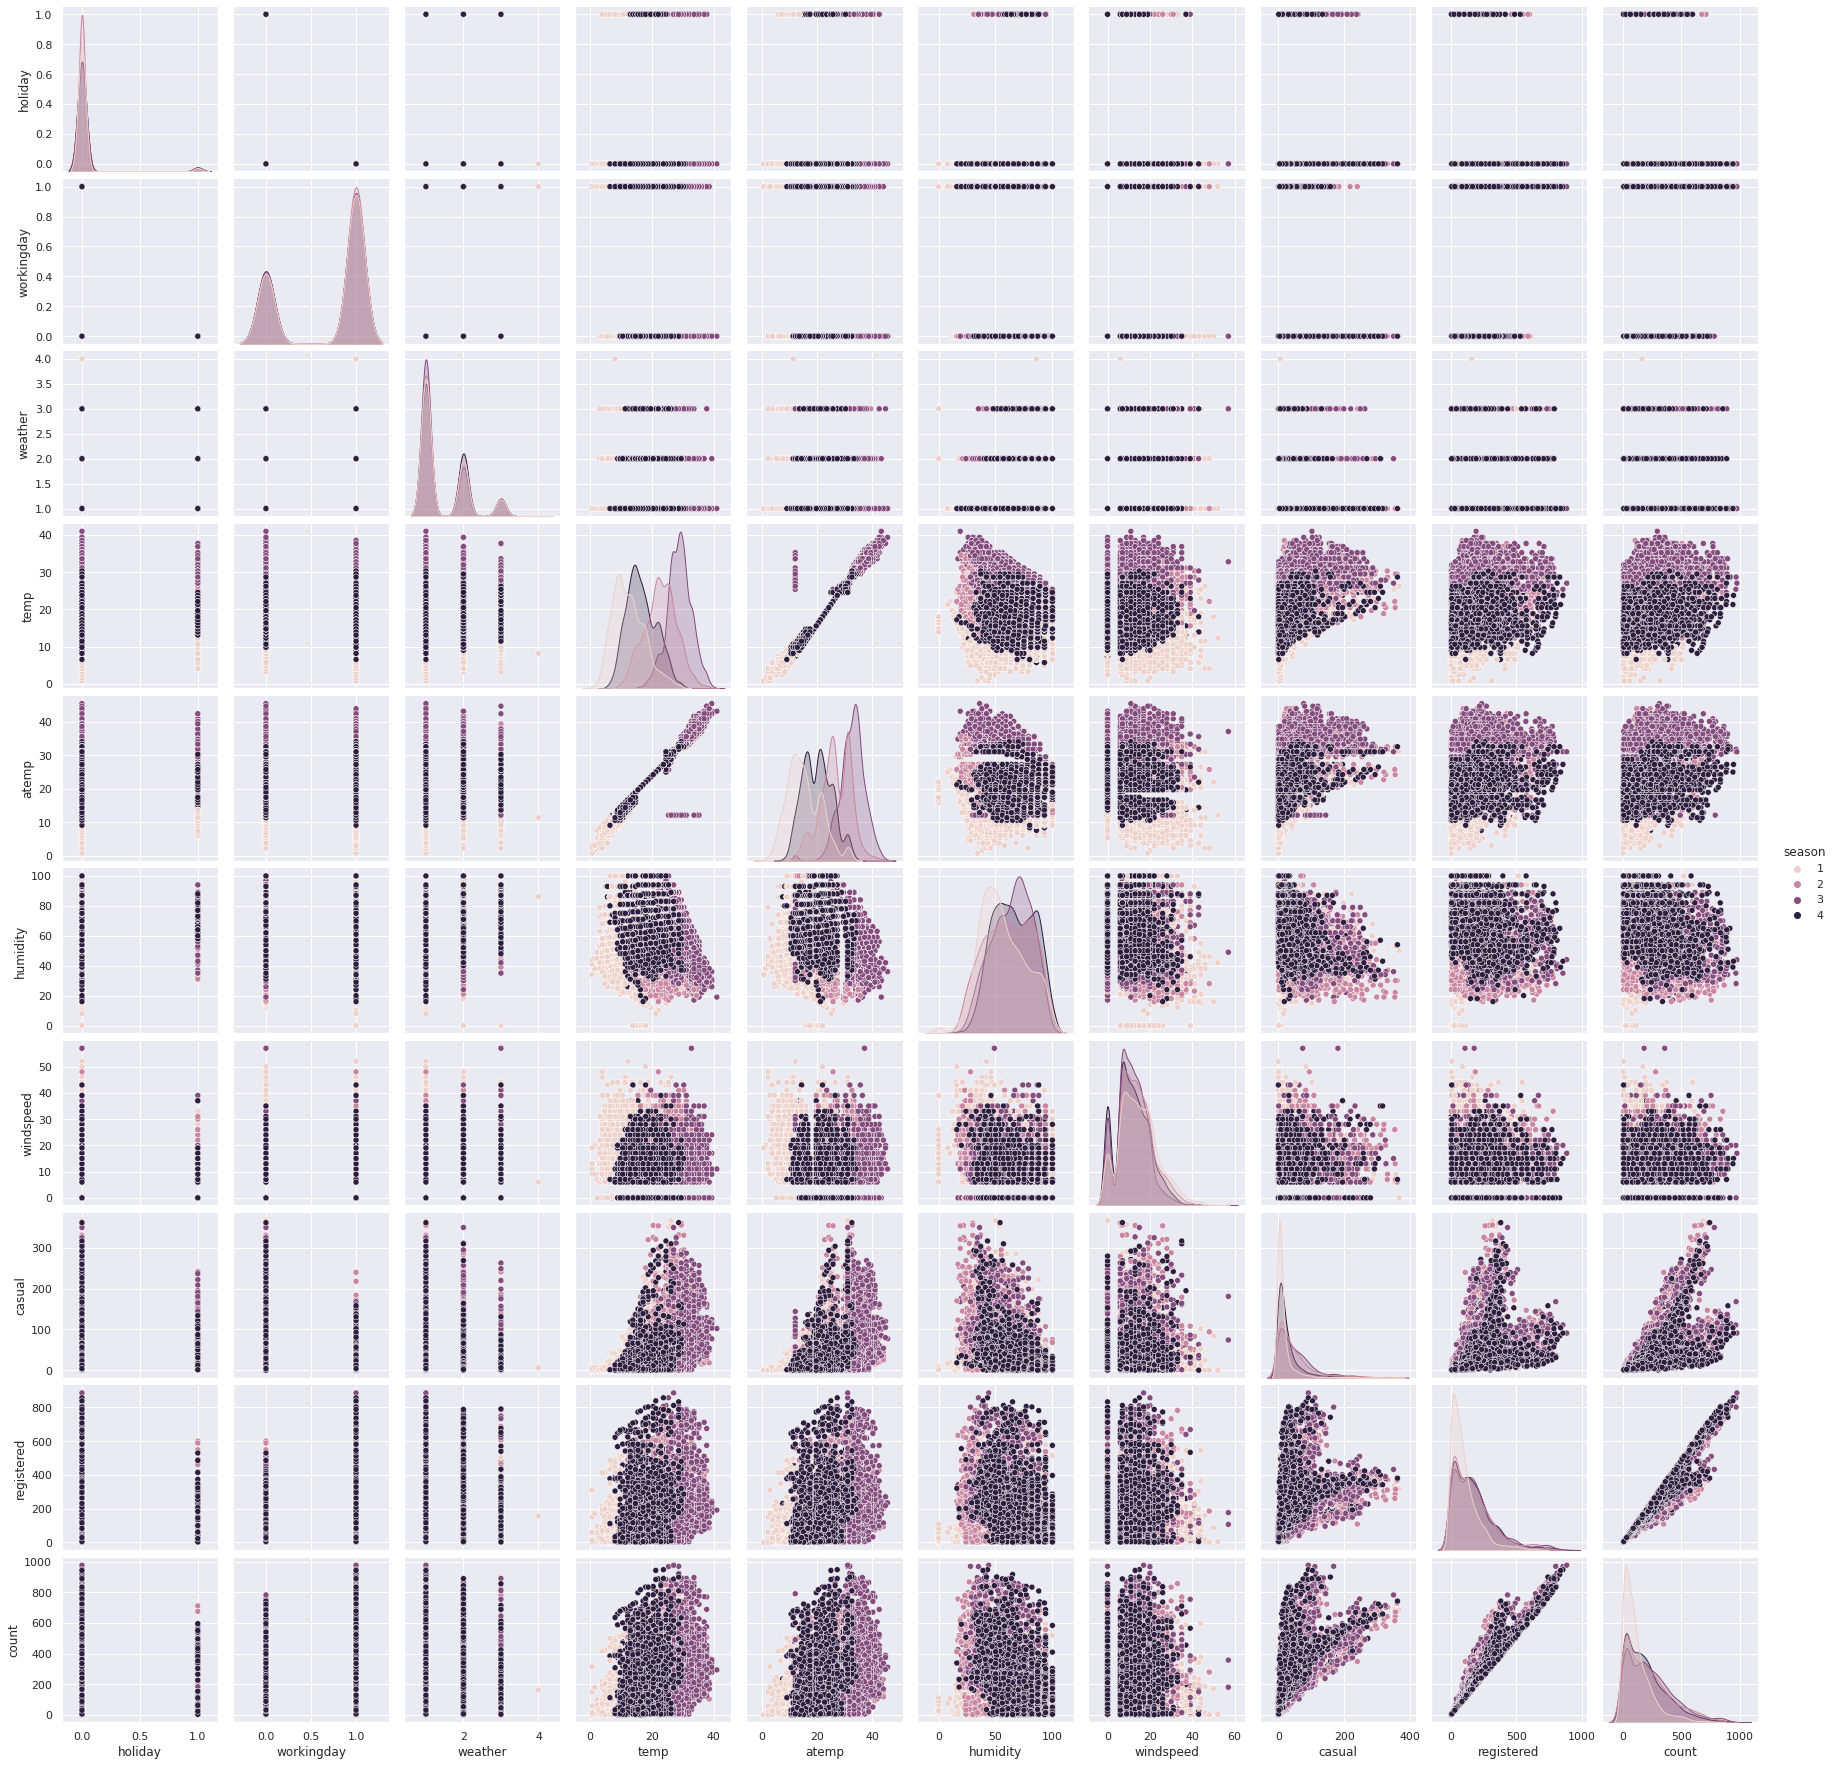

In [ ]:
sns.pairplot(data=da ,hue = 'season')
plt.show()

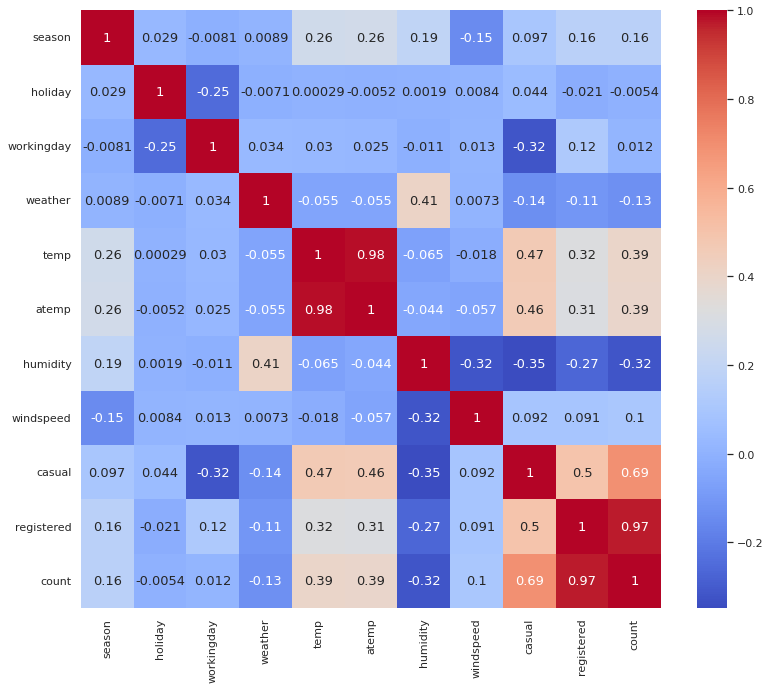

In [ ]:
# Correlation between 2 variables/features
# Registered and Count are closely positively correlated with 0.97 since registered users are dominant part of count compared to casual users
# Users Count(casual,registered) is also positively correlated with temp and atemp since going out is influenced by the temperature

#sns.set (rc = {'figure.figsize':(15, 13)})
plt.figure(figsize=(13,11))
sns.heatmap(da.corr(), cmap= "coolwarm", annot=True , annot_kws={'size': 13})
plt.show()

# Variables that Predict the demand of shared electric vechicles using hypothesis Testing

# Working Day effect on the number of vechicles

In [ ]:
# Working Day effect on the number of vechicles with significance as 5%

df_work = df[df['workingday'] == 1]
df_nonw = df[df['workingday'] == 0]

print(df_work.shape , df_nonw.shape)

(7412, 17) (3474, 17)


In [ ]:
# Null Hypothesis (Ho)        : Vechile count of casual users are same in working and non-working days
# Alternative Hypothesis (Ha) : Vechile count of casual users are different in working and non-working days

stats , p_value = ttest_ind(df_work['casual'] , df_nonw['casual'])
print('Mean of Casual Users in working days : ',df_work['casual'].mean())
print('Mean of Casual Users in non-working days : ',df_nonw['casual'].mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Vechile count of casual users are different in working and non-working days')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('Vechile count of casual users are same in working and non-working days')

Mean of Casual Users in working days :  25.10766324878575
Mean of Casual Users in non-working days :  59.30829015544042
Test Statistics :  -35.12830185964087
P-Value :  3.56196742360544e-256
Reject the Null (Ho) Hypothesis
Vechile count of casual users are different in working and non-working days


In [ ]:
# Null Hypothesis (Ho)        : Vechile count of registered users are same in working and non-working days
# Alternative Hypothesis (Ha) : Vechile count of registered users are different in working and non-working days

stats , p_value = ttest_ind(df_work['registered'] , df_nonw['registered'])
print('Mean of Registered Users in working days : ',df_work['registered'].mean())
print('Mean of Registered Users in non-working days : ',df_nonw['registered'].mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Vechile count of registered users are different in working and non-working days')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('Vechile count of registered users are same in working and non-working days')

Mean of Registered Users in working days :  167.9042093901781
Mean of Registered Users in non-working days :  129.19833045480715
Test Statistics :  12.552707000266874
P-Value :  6.806493719916074e-36
Reject the Null (Ho) Hypothesis
Vechile count of registered users are different in working and non-working days


In [ ]:
# Null Hypothesis (Ho)        : Vechile count of overall users are same in working and non-working days
# Alternative Hypothesis (Ha) : Vechile count of overall users are different in working and non-working days

stats , p_value = ttest_ind(df_work['count'] , df_nonw['count'])
print('Mean of Overall Users in working days : ',df_work['count'].mean())
print('Mean of Overall Users in non-working days : ',df_nonw['count'].mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Vechile count of overall users are different in working and non-working days')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('Vechile count of overall users are same in working and non-working days')

Mean of Overall Users in working days :  193.01187263896384
Mean of Overall Users in non-working days :  188.50662061024755
Test Statistics :  1.2096277376026694
P-Value :  0.22644804226361348
Fail to Reject the Null (Ho) Hypothesis
Vechile count of overall users are same in working and non-working days


# Weather dependency on Seasons

In [ ]:
# For Weather = 4, we have only one data and the minimum fequency in each cell should greater than 5, so we will remove the data and apply chi square test to check whether they are independent

dfc = df.copy()
dfc.drop(df[df['weather'] == 4].index , inplace = True)
pd.crosstab(index = dfc['season'] , columns = dfc['weather'] , margins = True)

weather     1     2    3    All
season                         
1        1759   715  211   2685
2        1801   708  224   2733
3        1930   604  199   2733
4        1702   807  225   2734
All      7192  2834  859  10885

In [ ]:
# Null Hypothesis (Ho)        : Weather is Independent of the season
# Alternative Hypothesis (Ha) : Weather is Dependent on the season
# Significance - 5%

stats , p_value , dof , exp = chi2_contingency(pd.crosstab(index = dfc['season'] , columns = dfc['weather']).values )

print('Observed : ', pd.crosstab(index = dfc['season'] , columns = dfc['weather']).values)
print('Mean of Casual Users in non-working days : ', exp)
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Weather is Dependent on the season')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('Weather is Independent of the season')

Observed :  [[1759  715  211]
 [1801  708  224]
 [1930  604  199]
 [1702  807  225]]
Mean of Casual Users in non-working days :  [[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]
Test Statistics :  46.10145731073249
P-Value :  2.8260014509929343e-08
Reject the Null (Ho) Hypothesis
Weather is Dependent on the season


# Cycles rented is similar or different in different seasons

In [ ]:
df_se1 = df[df['season'] == 1]
df_se2 = df[df['season'] == 2]
df_se3 = df[df['season'] == 3]
df_se4 = df[df['season'] == 4]

df_we1 = df[df['weather'] == 1]
df_we2 = df[df['weather'] == 2]
df_we3 = df[df['weather'] == 3]

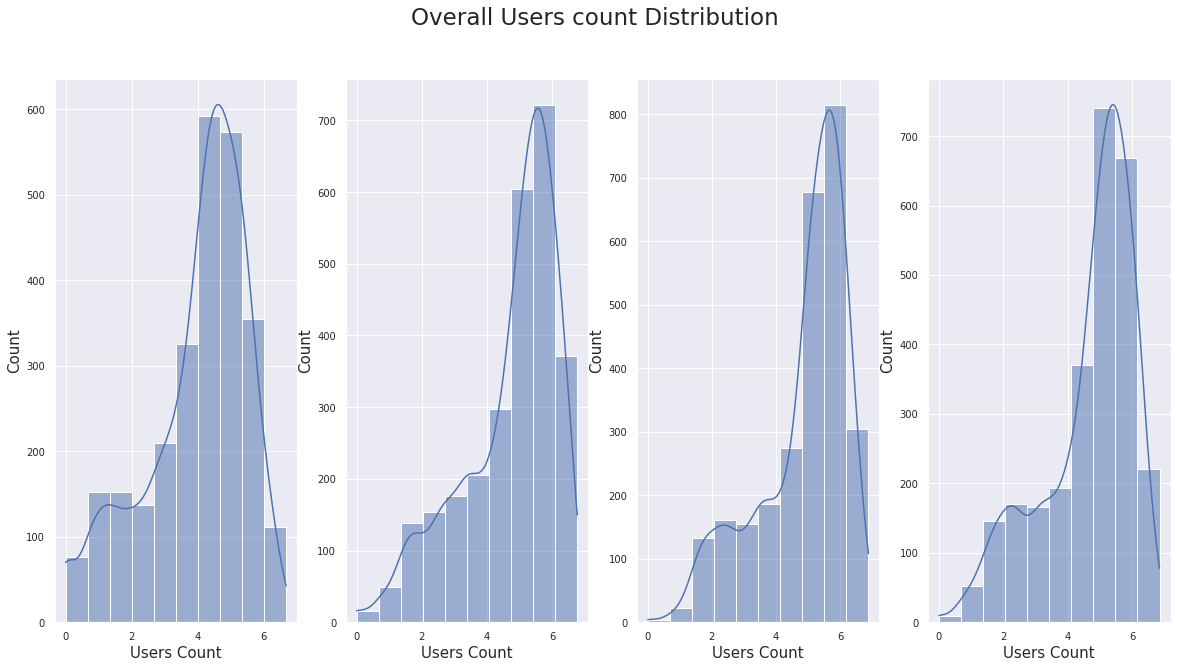

In [ ]:
# Log of user count is done to approximate as normal distribution
fig = plt.figure(figsize = (20,10))

plt.subplot(1,4,1)
sns.histplot(x = np.log(df_se1['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,2)
sns.histplot(x = np.log(df_se2['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,3)
sns.histplot(x = np.log(df_se3['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,4)
sns.histplot(x = np.log(df_se4['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

fig.suptitle("Overall Users count Distribution" , fontsize = 23)
plt.show()

In [ ]:
# Ho : Distributions are similar(normal)
# Ha : Distributions are not similar
cn =np.log(df_se1['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 1 is not normal')
else:
  print('Distribution 1 is normal')

cn =np.log(df_se2['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 2 is not normal')
else:
  print('Distribution 2 is normal')


cn =np.log(df_se3['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 3 is not normal')
else:
  print('Distribution 3 is normal')

cn =np.log(df_se4['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 4 is not normal')
else:
  print('Distribution 4 is normal')

Distribution 1 is not normal
Distribution 2 is not normal
Distribution 3 is not normal
Distribution 4 is not normal


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(df_se1['count'], df_se2['count'], df_se3['count'], df_se4['count'])
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


In [ ]:
# Both the required assumption are not satisfied( 1. Distribution should be normal , 2. Variances of the distributions are same), but we continue to check the ANOVA for the season
# Ho : All the seasons have the same number of count of vechicles
# Ha : Either one of the seasons have the different number of count of vechicles

stats , p_value = f_oneway(np.log(df_se1['count']) , np.log(df_se2['count']) , np.log(df_se3['count']), np.log(df_se4['count']))
print('Mean Count of 4 seaons : ', df_se1['count'].mean() , df_se2['count'].mean() , df_se3['count'].mean() , df_se4['count'].mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the seasons have the different number of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the seasons have the same number of count of vechicles')

Mean Count of 4 seaons :  116.34326135517499 215.25137211855105 234.417124039517 198.98829553767374
Test Statistics :  192.44768979509686
P-Value :  1.3071364586238867e-121
Reject the Null (Ho) Hypothesis
Either one of the seasons have the different number of count of vechicles


In [ ]:
# Kruskal-Wallis test can be used if ANOVA assumption is failed
# Ho : All the seasons have the same median of count of vechicles
# Ha : Either one of the seasons have different median of count of vechicles

stats , p_value = kruskal(df_se1['count'] , df_se2['count'] , df_se3['count'] , df_se4['count'])
print('Mean Count of 4 seaons : ', df_se1['count'].median() , df_se2['count'].median() , df_se3['count'].median() , df_se4['count'].median())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the seasons have the different median of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the seasons have the same median of count of vechicles')

Mean Count of 4 seaons :  78.0 172.0 195.0 161.0
Test Statistics :  699.6668548181988
P-Value :  2.479008372608633e-151
Reject the Null (Ho) Hypothesis
Either one of the seasons have the different median of count of vechicles


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


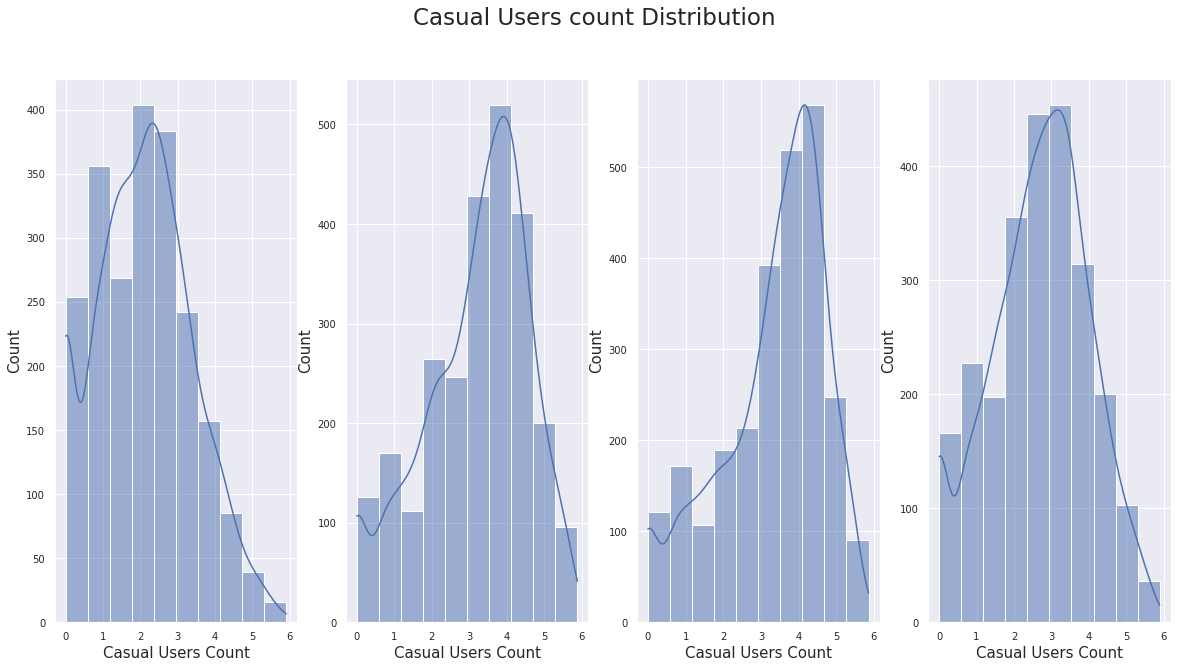

In [ ]:
# Log of user count is done to approximate as normal distribution
fig = plt.figure(figsize = (20,10))

plt.subplot(1,4,1)
sns.histplot(x = np.log(df_se1['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,2)
sns.histplot(x = np.log(df_se2['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,3)
sns.histplot(x = np.log(df_se3['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,4)
sns.histplot(x = np.log(df_se4['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

fig.suptitle("Casual Users count Distribution" , fontsize = 23)
plt.show()

In [ ]:
# Ho : Distributions are similar(normal)
# Ha : Distributions are not similar
cn =np.log(df_se1['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 1 is not normal')
else:
  print('Distribution 1 is normal')

cn =np.log(df_se2['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 2 is not normal')
else:
  print('Distribution 2 is normal')


cn =np.log(df_se3['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 3 is not normal')
else:
  print('Distribution 3 is normal')

cn =np.log(df_se4['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 4 is not normal')
else:
  print('Distribution 4 is normal')

Distribution 1 is not normal
Distribution 2 is not normal
Distribution 3 is not normal
Distribution 4 is not normal


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(df_se1['casual'], df_se2['casual'], df_se3['casual'], df_se4['casual'])
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


In [ ]:
# Both the required assumption are not satisfied( 1. Distribution should be normal , 2. Variances of the distributions are same), but we continue to check the ANOVA for the season
# Ho : All the seasons have the same number of count of vechicles
# Ha : Either one of the seasons have the different number of count of vechicles

stats , p_value = f_oneway(df_se1['casual'] , df_se2['casual'] , df_se3['casual'], df_se4['casual'])
print('Mean Count of 4 seaons : ', df_se1['casual'].mean() , df_se2['casual'].mean() , df_se3['casual'].mean() , df_se4['casual'].mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the seasons have the different number of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the seasons have the same number of count of vechicles')

Mean Count of 4 seaons :  15.489575577066269 47.44676180021954 52.2202707647274 28.580833942940746
Test Statistics :  344.6605621917358
P-Value :  7.937798855774506e-214
Reject the Null (Ho) Hypothesis
Either one of the seasons have the different number of count of vechicles


In [ ]:
# Kruskal-Wallis test can be used if ANOVA assumption is failed
# Ho : All the seasons have the same median of count of vechicles
# Ha : Either one of the seasons have different median of count of vechicles

stats , p_value = kruskal(df_se1['count'] , df_se2['count'] , df_se3['count'] , df_se4['count'])
print('Mean Count of 4 seaons : ', df_se1['count'].median() , df_se2['count'].median() , df_se3['count'].median() , df_se4['count'].median())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the seasons have the different median of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the seasons have the same median of count of vechicles')

Mean Count of 4 seaons :  78.0 172.0 195.0 161.0
Test Statistics :  699.6668548181988
P-Value :  2.479008372608633e-151
Reject the Null (Ho) Hypothesis
Either one of the seasons have the different median of count of vechicles


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


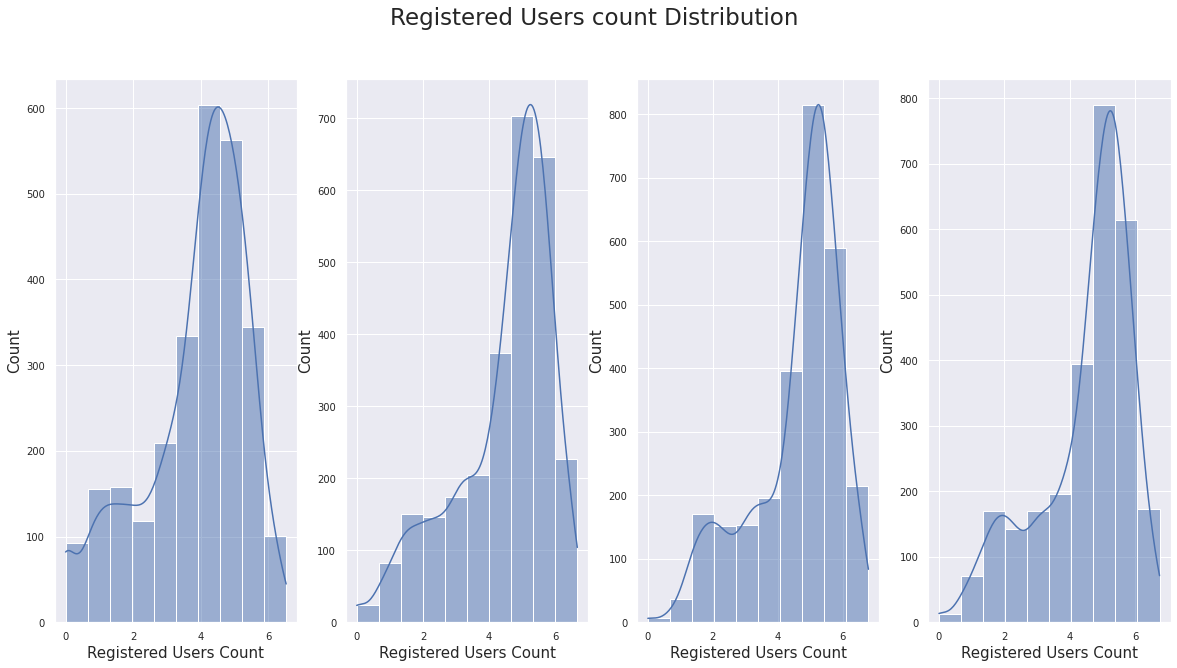

In [ ]:
# Log of user count is done to approximate as normal distribution
fig = plt.figure(figsize = (20,10))

plt.subplot(1,4,1)
sns.histplot(x = np.log(df_se1['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,2)
sns.histplot(x = np.log(df_se2['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,3)
sns.histplot(x = np.log(df_se3['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,4,4)
sns.histplot(x = np.log(df_se4['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

fig.suptitle("Registered Users count Distribution" , fontsize = 23)
plt.show()

In [ ]:
# Ho : Distributions are similar(normal)
# Ha : Distributions are not similar
cn =np.log(df_se1['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 1 is not normal')
else:
  print('Distribution 1 is normal')

cn =np.log(df_se2['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 2 is not normal')
else:
  print('Distribution 2 is normal')


cn =np.log(df_se3['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 3 is not normal')
else:
  print('Distribution 3 is normal')

cn =np.log(df_se4['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 4 is not normal')
else:
  print('Distribution 4 is normal')

Distribution 1 is not normal
Distribution 2 is not normal
Distribution 3 is not normal
Distribution 4 is not normal


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(df_se1['registered'], df_se2['registered'], df_se3['registered'], df_se4['registered'])
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


In [ ]:
# Both the required assumption are not satisfied( 1. Distribution should be normal , 2. Variances of the distributions are same), but we continue to check the ANOVA for the season
# Ho : All the seasons have the same number of count of vechicles
# Ha : Either one of the seasons have the different number of count of vechicles

stats , p_value = f_oneway(df_se1['registered'] , df_se2['registered'] , df_se3['registered'], df_se4['registered'])
print('Mean Count of 4 seaons : ', df_se1['registered'].mean() , df_se2['registered'].mean() , df_se3['registered'].mean() , df_se4['registered'].mean())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the seasons have the different number of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the seasons have the same number of count of vechicles')

Mean Count of 4 seaons :  100.85368577810871 167.8046103183315 182.19685327478962 170.40746159473298
Test Statistics :  167.97539126005708
P-Value :  1.8882994650328087e-106
Reject the Null (Ho) Hypothesis
Either one of the seasons have the different number of count of vechicles


In [ ]:
# Kruskal-Wallis test can be used if ANOVA assumption is failed
# Ho : All the seasons have the same median of count of vechicles
# Ha : Either one of the seasons have different median of count of vechicles

stats , p_value = kruskal(df_se1['registered'] , df_se2['registered'] , df_se3['registered'] , df_se4['registered'])
print('Mean Count of 4 seaons : ', df_se1['registered'].median() , df_se2['registered'].median() , df_se3['registered'].median() , df_se4['registered'].median())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the seasons have the different median of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the seasons have the same median of count of vechicles')

Mean Count of 4 seaons :  69.0 133.0 151.0 139.0
Test Statistics :  542.9283509737561
P-Value :  2.3698212326776174e-117
Reject the Null (Ho) Hypothesis
Either one of the seasons have the different median of count of vechicles


# Cycles rented is similar or different in different weather

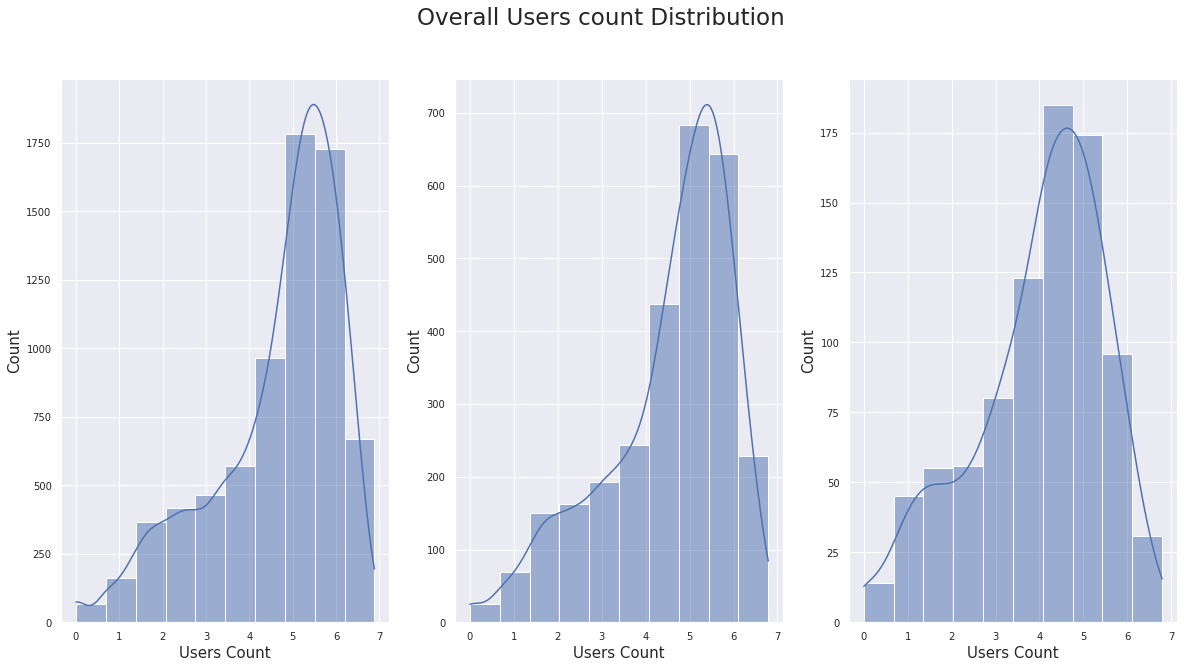

In [ ]:
# Log of user count is done to approximate as normal distribution
fig = plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.histplot(x = np.log(df_we1['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.histplot(x = np.log(df_we2['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.histplot(x = np.log(df_we3['count']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)


fig.suptitle("Overall Users count Distribution" , fontsize = 23)
plt.show()

In [ ]:
# Ho : Distributions are similar(normal)
# Ha : Distributions are not similar
cn =np.log(df_we1['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 1 is not normal')
else:
  print('Distribution 1 is normal')

cn =np.log(df_we2['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 2 is not normal')
else:
  print('Distribution 2 is normal')


cn =np.log(df_we3['count'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 3 is not normal')
else:
  print('Distribution 3 is normal')


Distribution 1 is not normal
Distribution 2 is not normal
Distribution 3 is not normal


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(df_we1['count'], df_we2['count'], df_we3['count'])
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


In [ ]:
# Both the required assumption are not satisfied( 1. Distribution should be normal , 2. Variances of the distributions are same), but we continue to check the ANOVA for the weather
# Ho : All the weather have the same number of count of vechicles
# Ha : Either one of the weather have the different number of count of vechicles

stats , p_value = f_oneway(np.log(df_we1['count']) , np.log(df_we2['count']) , np.log(df_we3['count']))
print('Mean Count of 4 seaons : ', df_we1['count'].mean() , df_we2['count'].mean() , df_we3['count'].mean() )
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the weather have the different number of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the weather have the same number of count of vechicles')

Mean Count of 4 seaons :  205.23679087875416 178.95553987297106 118.84633294528521
Test Statistics :  74.7507425644099
P-Value :  5.716684801108396e-33
Reject the Null (Ho) Hypothesis
Either one of the weather have the different number of count of vechicles


In [ ]:
# Kruskal-Wallis test can be used if ANOVA assumption is failed
# Ho : All the weather have the same median of count of vechicles
# Ha : Either one of the weather have different median of count of vechicles

stats , p_value = kruskal(df_we1['count'] , df_we2['count'] , df_we3['count'] )
print('Mean Count of 4 seaons : ', df_we1['count'].median() , df_we2['count'].median() , df_we3['count'].median())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the weather have the different median of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the weather have the same median of count of vechicles')

Mean Count of 4 seaons :  161.0 134.0 71.0
Test Statistics :  204.95566833068537
P-Value :  3.122066178659941e-45
Reject the Null (Ho) Hypothesis
Either one of the weather have the different median of count of vechicles


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


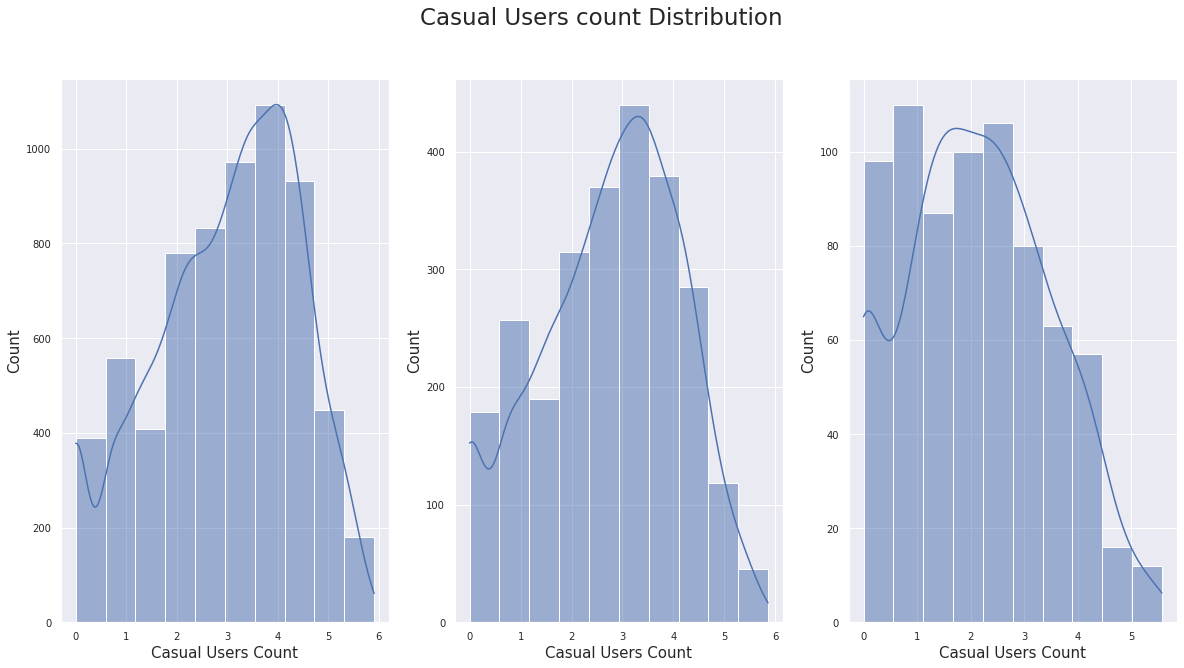

In [ ]:
# Log of user count is done to approximate as normal distribution
fig = plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.histplot(x = np.log(df_we1['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.histplot(x = np.log(df_we2['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.histplot(x = np.log(df_we3['casual']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Casual Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)


fig.suptitle("Casual Users count Distribution" , fontsize = 23)
plt.show()

In [ ]:
# Ho : Distributions are similar(normal)
# Ha : Distributions are not similar
cn =np.log(df_we1['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 1 is not normal')
else:
  print('Distribution 1 is normal')

cn =np.log(df_we2['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 2 is not normal')
else:
  print('Distribution 2 is normal')


cn =np.log(df_we3['casual'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 3 is not normal')
else:
  print('Distribution 3 is normal')


Distribution 1 is not normal
Distribution 2 is not normal
Distribution 3 is not normal


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(df_we1['casual'], df_we2['casual'], df_we3['casual'])
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


In [ ]:
# Both the required assumption are not satisfied( 1. Distribution should be normal , 2. Variances of the distributions are same), but we continue to check the ANOVA for the weather
# Ho : All the weather have the same number of count of vechicles
# Ha : Either one of the weather have the different number of count of vechicles

stats , p_value = f_oneway(df_we1['casual'] , df_we2['casual'] , df_we3['casual'])
print('Mean Count of 4 seaons : ', df_we1['casual'].mean() , df_we2['casual'].mean() , df_we3['casual'].mean() )
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the weather have the different number of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the weather have the same number of count of vechicles')

Mean Count of 4 seaons :  40.30867630700779 30.78546224417784 17.442374854481955
Test Statistics :  103.34153800150173
P-Value :  3.4692137318603457e-45
Reject the Null (Ho) Hypothesis
Either one of the weather have the different number of count of vechicles


In [ ]:
# Kruskal-Wallis test can be used if ANOVA assumption is failed
# Ho : All the weather have the same median of count of vechicles
# Ha : Either one of the weather have different median of count of vechicles

stats , p_value = kruskal(df_we1['casual'] , df_we2['casual'] , df_we3['casual'] )
print('Mean Count of 4 seaons : ', df_we1['casual'].median() , df_we2['casual'].median() , df_we3['casual'].median())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the weather have the different median of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the weather have the same median of count of vechicles')

Mean Count of 4 seaons :  20.0 15.0 6.0
Test Statistics :  284.63968453428794
P-Value :  1.5533804606552906e-62
Reject the Null (Ho) Hypothesis
Either one of the weather have the different median of count of vechicles


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


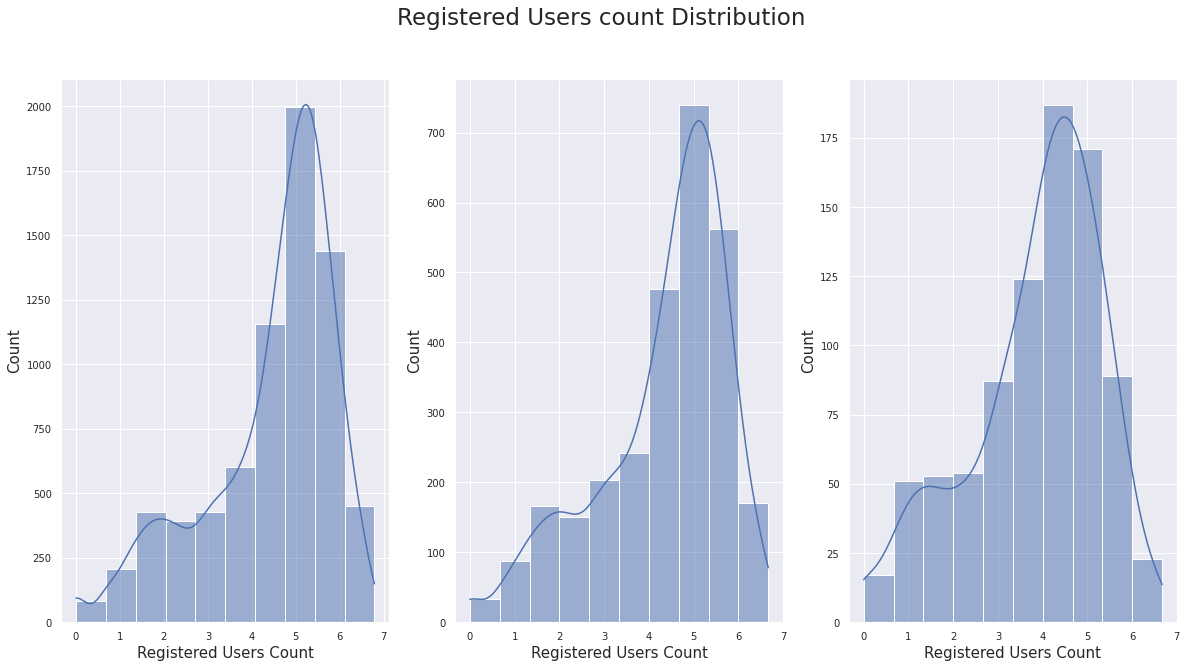

In [ ]:
# Log of user count is done to approximate as normal distribution
fig = plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.histplot(x = np.log(df_we1['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,3,2)
sns.histplot(x = np.log(df_we2['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,3,3)
sns.histplot(x = np.log(df_we3['registered']) , bins = 10 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Registered Users Count' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)


fig.suptitle("Registered Users count Distribution" , fontsize = 23)
plt.show()

In [ ]:
# Ho : Distributions are similar(normal)
# Ha : Distributions are not similar
cn =np.log(df_we1['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 1 is not normal')
else:
  print('Distribution 1 is normal')

cn =np.log(df_we2['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 2 is not normal')
else:
  print('Distribution 2 is normal')


cn =np.log(df_we3['registered'])
avg = cn.mean()
std = cn.std()
cnz = cn - avg /std
stats , p_vale = kstest(cnz , norm.cdf)
if p_value < 0.05:
  print('Distribution 3 is not normal')
else:
  print('Distribution 3 is normal')


Distribution 1 is not normal
Distribution 2 is not normal
Distribution 3 is not normal


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Ho : Variances of Distributions are similar
# Ha : Variances of Distributions are not similar
stats , p_value = levene(df_we1['registered'], df_we2['registered'], df_we3['registered'])
if p_value < 0.05:
  print('Variances of Distributions are not similar')
else:
  print('Variances of Distributions are similar')

Variances of Distributions are not similar


In [ ]:
# Both the required assumption are not satisfied( 1. Distribution should be normal , 2. Variances of the distributions are same), but we continue to check the ANOVA for the weather
# Ho : All the weather have the same number of count of vechicles
# Ha : Either one of the weather have the different number of count of vechicles

stats , p_value = f_oneway(df_we1['registered'] , df_we2['registered'] , df_we3['registered'])
print('Mean Count of 4 seaons : ', df_we1['registered'].mean() , df_we2['registered'].mean() , df_we3['registered'].mean() )
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the weather have the different number of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the weather have the same number of count of vechicles')

Mean Count of 4 seaons :  164.9281145717464 148.17007762879322 101.40395809080326
Test Statistics :  73.4008311153403
P-Value :  2.165354464253182e-32
Reject the Null (Ho) Hypothesis
Either one of the weather have the different number of count of vechicles


In [ ]:
# Kruskal-Wallis test can be used if ANOVA assumption is failed
# Ho : All the weather have the same median of count of vechicles
# Ha : Either one of the weather have different median of count of vechicles

stats , p_value = kruskal(df_we1['registered'] , df_we2['registered'] , df_we3['registered'] )
print('Mean Count of 4 seaons : ', df_we1['registered'].median() , df_we2['registered'].median() , df_we3['registered'].median())
print('Test Statistics : ',stats)
print('P-Value : ',p_value)
if p_value < 0.05:
  print('Reject the Null (Ho) Hypothesis')
  print('Either one of the weather have the different median of count of vechicles')
else:
  print('Fail to Reject the Null (Ho) Hypothesis')
  print('All the weather have the same median of count of vechicles')

Mean Count of 4 seaons :  130.0 112.0 64.0
Test Statistics :  173.74543971369232
P-Value :  1.8692058787992189e-38
Reject the Null (Ho) Hypothesis
Either one of the weather have the different median of count of vechicles


# Insights and Recommendations

**Insights:**
1.	Data is collected from the first 19 days of each month for the years 2011 and 2012 with hourly observations making the data count as 10886.
2.	Spring, Summer, Fall and Winter are the periods of Q1, Q2, Q3 and Q4 of the year.
3.	Medians of Casual, Registered and Overall Count of vehicles per hour is 17, 118 and 145.
4.	Casual Users count are more during non-working days whereas registered users are more during working days.
5.	Users tend to use more during the summer and fall especially when the weather is clear and when the temperature is comparatively higher and use very less during winter.
6.	On conducting t-test which resulted in p-value less than 0.05, we can confirm that number of vehicles used in a non-working day is more for casual users whereas it is more for working days in case of registered users.
7.	Conducting Chi square test, we can confirm that weather is always dependent on the seasons. ( p-value < 0.05).
8.	For ANOVA test on vehicle counts on different seasons, the basic assumptions (1. Distributions are to be normal, 2. Variances are the same) fails done using Kstest and levene test respectively.  Conducting ANOVA, gave p-value < 0.05, rejecting the null hypothesis and confirming that vehicle counts differ based on the seasons.
9.	For ANOVA test on vehicle counts on different weather, the basic assumptions (1. Distributions are to be normal, 2. Variances are the same) fails done using Kstest and levene test respectively.  Conducting ANOVA, gave p-value < 0.05, rejecting the null hypothesis and confirming that vehicle counts differ based on the weather.
10.	Kruskal-wallis test on medians, also confirmed the results of the ANOVA test by giving p-value < 0.05 and rejecting the null hypothesis.

--------------------------------------------------------------------------
**Recommendations:**\
\
From the Hypothesis test results, we can confirm that the Vehicle counts depends on the following factors : Working Day, Season, and Weather. So, we recommend the following:
1.	Registered Users on working days tend to use the vehicle more. So we recommend to market and advertise about the product across various corporates.
2.	Tie-ups with corporates on discounts to add more users. Setting up centres near those corporate hubs.
3.	Increasing the centres and tie-ups with leisure malls, theatres can increase the use of casual users during the holidays.
4.	Reducing the pricing during the worst hit seasons Spring and Winter and using push notifications to push the usage. Also providing route insights during those seasons.
5.	Symbolise each centre with nearest landmarks and promoting those landmarks can increase the demand and suggesting nearby places to visit.
6.	Students can be thought of registered users, providing monthly/yearly passes.
